# Preliminary explorations
We're going to primarily look at the following here:
- general behavior (exploration changes if any)
- ripple rates
- theta cycle counts 

In [1]:
import numpy as np 
import cv2
import os
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)
import nelpy as nel  
import nelpy.plotting as npl
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm.notebook import tqdm as tqdm

In [2]:
# Shay's plot settings
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Std', font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 10, 'xtick.labelsize': 20}))
%matplotlib inline 

# Load up data

In [3]:
#Streaker FPS
cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakerfamday0.mp4")
FPSStreakerFamDay0 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakerfamday1.mp4")
FPSStreakerFamDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakerfam1day2.mp4")
FPSStreakerFam1Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakerfam2day2.mp4")
FPSStreakerFam2Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakerfam1day3.mp4")
FPSStreakerFam1Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakerfam2day3.mp4")
FPSStreakerFam2Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakertestday0.mp4")
FPSStreakerTestDay0 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakertestday1.mp4")
FPSStreakerTestDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakertest1day2.mp4")
FPSStreakerTest1Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakertest2day2.mp4")
FPSStreakerTest2Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakertest1day3.mp4")
FPSStreakerTest1Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Streaker/streakertest2day3.mp4")
FPSStreakerTest2Day3 = cap.get(cv2.CAP_PROP_FPS)


In [4]:
#Squeaker FPS
cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakerfamday0.mp4")
FPSSqueakerFamDay0 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakerfamday1.mp4")
FPSSqueakerFamDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakerfam1day2.mp4")
FPSSqueakerFam1Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakerfam2day2.mp4")
FPSSqueakerFam2Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakerfam1day3.mp4")
FPSSqueakerFam1Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakerfam2day3.mp4")
FPSSqueakerFam2Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakertestday0.mp4")
FPSSqueakerTestDay0 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakertestday1.mp4")
FPSSqueakerTestDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakertest1day2.mp4")
FPSSqueakerTest1Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakertest2day2.mp4")
FPSSqueakerTest2Day2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakertest1day3.mp4")
FPSSqueakerTest1Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Squeaker/squeakertest2day3.mp4")
FPSSqueakerTest2Day3 = cap.get(cv2.CAP_PROP_FPS)


In [5]:
#island FPS
cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandfamday1.mp4")
FPSIslandFamDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandtestday1.mp4")
FPSIslandTestDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandfamday2.mp4")
FPSIslandFamDay2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandtestday2.mp4")
FPSIslandTestDay2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandfamday3.mp4")
FPSIslandFamDay3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandtestday3.mp4")
FPSIslandTestDay3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandfamday4.mp4")
FPSIslandFamDay4 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/Island/islandtestday4.mp4")
FPSIslandTestDay4 = cap.get(cv2.CAP_PROP_FPS)

In [6]:
#JunePhatRat FPS
cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junefamday1.mp4")
FPSJunePhatRatFamDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junetestday1.mp4")
FPSJunePhatRatTestDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junefamday2.mp4")
FPSJunePhatRatFamDay2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junetestday2.mp4")
FPSJunePhatRatTestDay2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junefam1day3.mp4")
FPSJunePhatRatFam1Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junetest1day3.mp4")
FPSJunePhatRatTest1Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junefam2day3.mp4")
FPSJunePhatRatFam2Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junetest2day3.mp4")
FPSJunePhatRatTest2Day3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junefamday4.mp4")
FPSJunePhatRatFamDay4 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/JunePhatRat/junetestday4.mp4")
FPSJunePhatRatTestDay4 = cap.get(cv2.CAP_PROP_FPS)

In [7]:
#FinalControl FPS
cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControlfamday1.mp4")
FPSFinalControlFamDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControltestday1.mp4")
FPSFinalControlTestDay1 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControlfamday2.mp4")
FPSFinalControlFamDay2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControltestday2.mp4")
FPSFinalControlTestDay2 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControlfamday3.mp4")
FPSFinalControlFamDay3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControltestday3.mp4")
FPSFinalControlTestDay3 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControlfam1day4.mp4")
FPSFinalControlFam1Day4 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControltest1day4.mp4")
FPSFinalControlTest1Day4 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControlfam2day4.mp4")
FPSFinalControlFam2Day4 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControltest2day4.mp4")
FPSFinalControlTest2Day4 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControlfamday5.mp4")
FPSFinalControlFamDay5 = cap.get(cv2.CAP_PROP_FPS)

cap=cv2.VideoCapture("/Volumes/JIM-128G/FinalControl/FinalControltestday5.mp4")
FPSFinalControlTestDay5 = cap.get(cv2.CAP_PROP_FPS)

In [8]:
# Streaker mid head positions
headPosStreakerFamDay0 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakerfamday0midHeadPos.npz")["headPos"]
headPosStreakerFamDay0 = headPosStreakerFamDay0[~np.all(headPosStreakerFamDay0 == 0, axis=1)] #remove 0,0 entries
headPosStreakerFamDay0ASA = nel.AnalogSignalArray(headPosStreakerFamDay0.T, fs=FPSStreakerFamDay0)
headPosStreakerFamDay0ASA = headPosStreakerFamDay0ASA.smooth(sigma=0.075)
headPosStreakerFamDay0 = headPosStreakerFamDay0ASA.data.T

headPosStreakerTestDay0 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakertestday0midHeadPos.npz")["headPos"]
headPosStreakerTestDay0 = headPosStreakerTestDay0[~np.all(headPosStreakerTestDay0 == 0, axis=1)] #remove 0,0 entries
headPosStreakerTestDay0ASA = nel.AnalogSignalArray(headPosStreakerTestDay0.T, fs=FPSStreakerTestDay0)
headPosStreakerTestDay0ASA = headPosStreakerTestDay0ASA.smooth(sigma=0.075)
headPosStreakerTestDay0 = headPosStreakerTestDay0ASA.data.T

headPosStreakerFamDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakerfamday1midHeadPos.npz")["headPos"]
headPosStreakerFamDay1 = headPosStreakerFamDay1[~np.all(headPosStreakerFamDay1 == 0, axis=1)] #remove 0,0 entries
headPosStreakerFamDay1ASA = nel.AnalogSignalArray(headPosStreakerFamDay1.T, fs=FPSStreakerFamDay1)
headPosStreakerFamDay1ASA = headPosStreakerFamDay1ASA.smooth(sigma=0.075)
headPosStreakerFamDay1 = headPosStreakerFamDay1ASA.data.T

headPosStreakerTestDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakertestday1midHeadPos.npz")["headPos"]
headPosStreakerTestDay1 = headPosStreakerTestDay1[~np.all(headPosStreakerTestDay1 == 0, axis=1)] #remove 0,0 entries
headPosStreakerTestDay1ASA = nel.AnalogSignalArray(headPosStreakerTestDay1.T, fs=FPSStreakerTestDay1)
headPosStreakerTestDay1ASA = headPosStreakerTestDay1ASA.smooth(sigma=0.075)
headPosStreakerTestDay1 = headPosStreakerTestDay1ASA.data.T

headPosStreakerFam1Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakerfam1day2midHeadPos.npz")["headPos"]
headPosStreakerFam1Day2 = headPosStreakerFam1Day2[~np.all(headPosStreakerFam1Day2 == 0, axis=1)] #remove 0,0 entries
headPosStreakerFam1Day2ASA = nel.AnalogSignalArray(headPosStreakerFam1Day2.T, fs=FPSStreakerFam1Day2)
headPosStreakerFam1Day2ASA = headPosStreakerFam1Day2ASA.smooth(sigma=0.075)
headPosStreakerFam1Day2 = headPosStreakerFam1Day2ASA.data.T

headPosStreakerTest1Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakertest1day2midHeadPos.npz")["headPos"]
headPosStreakerTest1Day2 = headPosStreakerTest1Day2[~np.all(headPosStreakerTest1Day2 == 0, axis=1)] #remove 0,0 entries
headPosStreakerTest1Day2ASA = nel.AnalogSignalArray(headPosStreakerTest1Day2.T, fs=FPSStreakerTest1Day2)
headPosStreakerTest1Day2ASA = headPosStreakerTest1Day2ASA.smooth(sigma=0.075)
headPosStreakerTest1Day2 = headPosStreakerTest1Day2ASA.data.T

headPosStreakerFam2Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakerfam2day2midHeadPos.npz")["headPos"]
headPosStreakerFam2Day2 = headPosStreakerFam2Day2[~np.all(headPosStreakerFam2Day2 == 0, axis=1)] #remove 0,0 entries
headPosStreakerFam2Day2ASA = nel.AnalogSignalArray(headPosStreakerFam2Day2.T, fs=FPSStreakerFam2Day2)
headPosStreakerFam2Day2ASA = headPosStreakerFam2Day2ASA.smooth(sigma=0.075)
headPosStreakerFam2Day2 = headPosStreakerFam2Day2ASA.data.T

headPosStreakerTest2Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakertest2day2midheadPos.npz")["headPos"]
headPosStreakerTest2Day2 = headPosStreakerTest2Day2[~np.all(headPosStreakerTest2Day2 == 0, axis=1)] #remove 0,0 entries
headPosStreakerTest2Day2ASA = nel.AnalogSignalArray(headPosStreakerTest2Day2.T, fs=FPSStreakerTest2Day2)
headPosStreakerTest2Day2ASA = headPosStreakerTest2Day2ASA.smooth(sigma=0.075)
headPosStreakerTest2Day2 = headPosStreakerTest2Day2ASA.data.T

headPosStreakerFam1Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakerfam1day3midHeadPos.npz")["headPos"]
headPosStreakerFam1Day3 = headPosStreakerFam1Day3[~np.all(headPosStreakerFam1Day3 == 0, axis=1)] #remove 0,0 entries
headPosStreakerFam1Day3ASA = nel.AnalogSignalArray(headPosStreakerFam1Day3.T, fs=FPSStreakerFam1Day3)
headPosStreakerFam1Day3ASA = headPosStreakerFam1Day3ASA.smooth(sigma=0.075)
headPosStreakerFam1Day3 = headPosStreakerFam1Day3ASA.data.T

headPosStreakerTest1Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakertest1day3midHeadPos.npz")["headPos"]
headPosStreakerTest1Day3 = headPosStreakerTest1Day3[~np.all(headPosStreakerTest1Day3 == 0, axis=1)] #remove 0,0 entries
headPosStreakerTest1Day3ASA = nel.AnalogSignalArray(headPosStreakerTest1Day3.T, fs=FPSStreakerTest1Day3)
headPosStreakerTest1Day3ASA = headPosStreakerTest1Day3ASA.smooth(sigma=0.075)
headPosStreakerTest1Day3 = headPosStreakerTest1Day3ASA.data.T

headPosStreakerFam2Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakerfam2day3midHeadPos.npz")["headPos"]
headPosStreakerFam2Day3 = headPosStreakerFam2Day3[~np.all(headPosStreakerFam2Day3 == 0, axis=1)] #remove 0,0 entries
headPosStreakerFam2Day3ASA = nel.AnalogSignalArray(headPosStreakerFam2Day3.T, fs=FPSStreakerFam2Day3)
headPosStreakerFam2Day3ASA = headPosStreakerFam2Day3ASA.smooth(sigma=0.075)
headPosStreakerFam2Day3 = headPosStreakerFam2Day3ASA.data.T

headPosStreakerTest2Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Streaker/midHeadPos/streakertest2day3midHeadPos.npz")["headPos"]
headPosStreakerTest2Day3 = headPosStreakerTest2Day3[~np.all(headPosStreakerTest2Day3 == 0, axis=1)] #remove 0,0 entries
headPosStreakerTest2Day3ASA = nel.AnalogSignalArray(headPosStreakerTest2Day3.T, fs=FPSStreakerTest2Day3)
headPosStreakerTest2Day3ASA = headPosStreakerTest2Day3ASA.smooth(sigma=0.075)
headPosStreakerTest2Day3 = headPosStreakerTest2Day3ASA.data.T

In [9]:
# Squeaker mid head positions
headPosSqueakerFamDay0 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakerfamday0midHeadPos.npz")["headPos"]
headPosSqueakerFamDay0 = headPosSqueakerFamDay0[~np.all(headPosSqueakerFamDay0 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerFamDay0ASA = nel.AnalogSignalArray(headPosSqueakerFamDay0.T, fs=FPSSqueakerFamDay0)
headPosSqueakerFamDay0ASA = headPosSqueakerFamDay0ASA.smooth(sigma=0.075)
headPosSqueakerFamDay0 = headPosSqueakerFamDay0ASA.data.T

headPosSqueakerTestDay0 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakertestday0midHeadPos.npz")["headPos"]
headPosSqueakerTestDay0 = headPosSqueakerTestDay0[~np.all(headPosSqueakerTestDay0 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerTestDay0ASA = nel.AnalogSignalArray(headPosSqueakerTestDay0.T, fs=FPSSqueakerTestDay0)
headPosSqueakerTestDay0ASA = headPosSqueakerTestDay0ASA.smooth(sigma=0.075)
headPosSqueakerTestDay0 = headPosSqueakerTestDay0ASA.data.T

headPosSqueakerFamDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakerfamday1midHeadPos.npz")["headPos"]
headPosSqueakerFamDay1 = headPosSqueakerFamDay1[~np.all(headPosSqueakerFamDay1 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerFamDay1ASA = nel.AnalogSignalArray(headPosSqueakerFamDay1.T, fs=FPSSqueakerFamDay1)
headPosSqueakerFamDay1ASA = headPosSqueakerFamDay1ASA.smooth(sigma=0.075)
headPosSqueakerFamDay1 = headPosSqueakerFamDay1ASA.data.T

headPosSqueakerTestDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakertestday1midHeadPos.npz")["headPos"]
headPosSqueakerTestDay1 = headPosSqueakerTestDay1[~np.all(headPosSqueakerTestDay1 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerTestDay1ASA = nel.AnalogSignalArray(headPosSqueakerTestDay1.T, fs=FPSSqueakerTestDay1)
headPosSqueakerTestDay1ASA = headPosSqueakerTestDay1ASA.smooth(sigma=0.075)
headPosSqueakerTestDay1 = headPosSqueakerTestDay1ASA.data.T

headPosSqueakerFam1Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakerfam1day2midHeadPos.npz")["headPos"]
headPosSqueakerFam1Day2 = headPosSqueakerFam1Day2[~np.all(headPosSqueakerFam1Day2 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerFam1Day2ASA = nel.AnalogSignalArray(headPosSqueakerFam1Day2.T, fs=FPSSqueakerFam1Day2)
headPosSqueakerFam1Day2ASA = headPosSqueakerFam1Day2ASA.smooth(sigma=0.075)
headPosSqueakerFam1Day2 = headPosSqueakerFam1Day2ASA.data.T

headPosSqueakerTest1Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakertest1day2midHeadPos.npz")["headPos"]
headPosSqueakerTest1Day2 = headPosSqueakerTest1Day2[~np.all(headPosSqueakerTest1Day2 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerTest1Day2ASA = nel.AnalogSignalArray(headPosSqueakerTest1Day2.T, fs=FPSSqueakerTest1Day2)
headPosSqueakerTest1Day2ASA = headPosSqueakerTest1Day2ASA.smooth(sigma=0.075)
headPosSqueakerTest1Day2 = headPosSqueakerTest1Day2ASA.data.T

headPosSqueakerFam2Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakerfam2day2midHeadPos.npz")["headPos"]
headPosSqueakerFam2Day2 = headPosSqueakerFam2Day2[~np.all(headPosSqueakerFam2Day2 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerFam2Day2ASA = nel.AnalogSignalArray(headPosSqueakerFam2Day2.T, fs=FPSSqueakerFam2Day2)
headPosSqueakerFam2Day2ASA = headPosSqueakerFam2Day2ASA.smooth(sigma=0.075)
headPosSqueakerFam2Day2 = headPosSqueakerFam2Day2ASA.data.T

headPosSqueakerFam1Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakerfam1day3midHeadPos.npz")["headPos"]
headPosSqueakerFam1Day3 = headPosSqueakerFam1Day3[~np.all(headPosSqueakerFam1Day3 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerFam1Day3ASA = nel.AnalogSignalArray(headPosSqueakerFam1Day3.T, fs=FPSSqueakerFam1Day3)
headPosSqueakerFam1Day3ASA = headPosSqueakerFam1Day3ASA.smooth(sigma=0.075)
headPosSqueakerFam1Day3 = headPosSqueakerFam1Day3ASA.data.T

headPosSqueakerTest2Day2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakertest2day2midheadPos.npz")["headPos"]
headPosSqueakerTest2Day2 = headPosSqueakerTest2Day2[~np.all(headPosSqueakerTest2Day2 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerTest2Day2ASA = nel.AnalogSignalArray(headPosSqueakerTest2Day2.T, fs=FPSSqueakerTest2Day2)
headPosSqueakerTest2Day2ASA = headPosSqueakerTest2Day2ASA.smooth(sigma=0.075)
headPosSqueakerTest2Day2 = headPosSqueakerTest2Day2ASA.data.T

headPosSqueakerTest1Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakertest1day3midHeadPos.npz")["headPos"]
headPosSqueakerTest1Day3 = headPosSqueakerTest1Day3[~np.all(headPosSqueakerTest1Day3 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerTest1Day3ASA = nel.AnalogSignalArray(headPosSqueakerTest1Day3.T, fs=FPSSqueakerTest1Day3)
headPosSqueakerTest1Day3ASA = headPosSqueakerTest1Day3ASA.smooth(sigma=0.075)
headPosSqueakerTest1Day3 = headPosSqueakerTest1Day3ASA.data.T

headPosSqueakerFam2Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakerfam2day3midHeadPos.npz")["headPos"]
headPosSqueakerFam2Day3 = headPosSqueakerFam2Day3[~np.all(headPosSqueakerFam2Day3 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerFam2Day3ASA = nel.AnalogSignalArray(headPosSqueakerFam2Day3.T, fs=FPSSqueakerFam2Day3)
headPosSqueakerFam2Day3ASA = headPosSqueakerFam2Day3ASA.smooth(sigma=0.075)
headPosSqueakerFam2Day3 = headPosSqueakerFam2Day3ASA.data.T

headPosSqueakerTest2Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Squeaker/midHeadPos/squeakertest2day3midHeadPos.npz")["headPos"]
headPosSqueakerTest2Day3 = headPosSqueakerTest2Day3[~np.all(headPosSqueakerTest2Day3 == 0, axis=1)] #remove 0,0 entries
headPosSqueakerTest2Day3ASA = nel.AnalogSignalArray(headPosSqueakerTest2Day3.T, fs=FPSSqueakerTest2Day3)
headPosSqueakerTest2Day3ASA = headPosSqueakerTest2Day3ASA.smooth(sigma=0.075)
headPosSqueakerTest2Day3 = headPosSqueakerTest2Day3ASA.data.T

In [10]:
#island mid head positions
headPosIslandFamDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandfamday1midHeadPos.npz")["headPos"]
headPosIslandFamDay1 = headPosIslandFamDay1[~np.all(headPosIslandFamDay1 == 0, axis=1)] #remove 0,0 entries
headPosIslandFamDay1ASA = nel.AnalogSignalArray(headPosIslandFamDay1.T, fs=FPSIslandFamDay1)
headPosIslandFamDay1ASA = headPosIslandFamDay1ASA.smooth(sigma=0.075)
headPosIslandFamDay1 = headPosIslandFamDay1ASA.data.T

headPosIslandTestDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandtestday1midHeadPos.npz")["headPos"]
headPosIslandTestDay1 = headPosIslandTestDay1[~np.all(headPosIslandTestDay1 == 0, axis=1)] #remove 0,0 entries
headPosIslandTestDay1ASA = nel.AnalogSignalArray(headPosIslandTestDay1.T, fs=FPSIslandTestDay1)
headPosIslandTestDay1ASA = headPosIslandTestDay1ASA.smooth(sigma=0.075)
headPosIslandTestDay1 = headPosIslandTestDay1ASA.data.T

headPosIslandFamDay2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandfamday2midHeadPos.npz")["headPos"]
headPosIslandFamDay2 = headPosIslandFamDay2[~np.all(headPosIslandFamDay2 == 0, axis=1)] #remove 0,0 entries
headPosIslandFamDay2ASA = nel.AnalogSignalArray(headPosIslandFamDay2.T, fs=FPSIslandFamDay2)
headPosIslandFamDay2ASA = headPosIslandFamDay2ASA.smooth(sigma=0.075)
headPosIslandFamDay2 = headPosIslandFamDay2ASA.data.T

headPosIslandTestDay2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandtestday2midHeadPos.npz")["headPos"]
headPosIslandTestDay2 = headPosIslandTestDay2[~np.all(headPosIslandTestDay2 == 0, axis=1)] #remove 0,0 entries
headPosIslandTestDay2ASA = nel.AnalogSignalArray(headPosIslandTestDay2.T, fs=FPSIslandTestDay2)
headPosIslandTestDay2ASA = headPosIslandTestDay2ASA.smooth(sigma=0.075)
headPosIslandTestDay2 = headPosIslandTestDay2ASA.data.T

#headPosIslandFamDay3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandfamday3midHeadPos.npz")["headPos"]
#headPosIslandFamDay3 = headPosIslandFamDay3[~np.all(headPosIslandFamDay3 == 0, axis=1)] #remove 0,0 entries

headPosIslandTestDay3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandtestday3midHeadPos.npz")["headPos"]
headPosIslandTestDay3 = headPosIslandTestDay3[~np.all(headPosIslandTestDay3 == 0, axis=1)] #remove 0,0 entries
headPosIslandTestDay3ASA = nel.AnalogSignalArray(headPosIslandTestDay3.T, fs=FPSIslandTestDay3)
headPosIslandTestDay3ASA = headPosIslandTestDay3ASA.smooth(sigma=0.075)
headPosIslandTestDay3 = headPosIslandTestDay3ASA.data.T

headPosIslandFamDay4 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandfamday4midHeadPos.npz")["headPos"]
headPosIslandFamDay4 = headPosIslandFamDay4[~np.all(headPosIslandFamDay4 == 0, axis=1)] #remove 0,0 entries
headPosIslandFamDay4ASA = nel.AnalogSignalArray(headPosIslandFamDay4.T, fs=FPSIslandFamDay4)
headPosIslandFamDay4ASA = headPosIslandFamDay4ASA.smooth(sigma=0.075)
headPosIslandFamDay4 = headPosIslandFamDay4ASA.data.T

headPosIslandTestDay4 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/Island/midHeadPos/islandtestday4midHeadPos.npz")["headPos"]
headPosIslandTestDay4 = headPosIslandTestDay4[~np.all(headPosIslandTestDay4 == 0, axis=1)] #remove 0,0 entries
headPosIslandTestDay4ASA = nel.AnalogSignalArray(headPosIslandTestDay4.T, fs=FPSIslandTestDay4)
headPosIslandTestDay4ASA = headPosIslandTestDay4ASA.smooth(sigma=0.075)
headPosIslandTestDay4 = headPosIslandTestDay4ASA.data.T

In [11]:
#JunePhatRat mid head positions
headPosJuneFamDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junefamday1midHeadPos.npz")["headPos"]
headPosJuneFamDay1 = headPosJuneFamDay1[~np.all(headPosJuneFamDay1 == 0, axis=1)] #remove 0,0 entries
headPosJuneFamDay1ASA = nel.AnalogSignalArray(headPosJuneFamDay1.T, fs=FPSJunePhatRatFamDay1)
headPosJuneFamDay1ASA = headPosJuneFamDay1ASA.smooth(sigma=0.075)
headPosJuneFamDay1 = headPosJuneFamDay1ASA.data.T

headPosJuneTestDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junetestday1midHeadPos.npz")["headPos"]
headPosJuneTestDay1 = headPosJuneTestDay1[~np.all(headPosJuneTestDay1 == 0, axis=1)] #remove 0,0 entries
headPosJuneTestDay1ASA = nel.AnalogSignalArray(headPosJuneTestDay1.T, fs=FPSJunePhatRatTestDay1)
headPosJuneTestDay1ASA = headPosJuneTestDay1ASA.smooth(sigma=0.075)
headPosJuneTestDay1 = headPosJuneTestDay1ASA.data.T

headPosJuneFamDay2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junefamday2midHeadPos.npz")["headPos"]
headPosJuneFamDay2 = headPosJuneFamDay2[~np.all(headPosJuneFamDay2 == 0, axis=1)] #remove 0,0 entries
headPosJuneFamDay2ASA = nel.AnalogSignalArray(headPosJuneFamDay2.T, fs=FPSJunePhatRatFamDay2)
headPosJuneFamDay2ASA = headPosJuneFamDay2ASA.smooth(sigma=0.075)
headPosJuneFamDay2 = headPosJuneFamDay2ASA.data.T

headPosJuneTestDay2 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junetestday2midHeadPos.npz")["headPos"]
headPosJuneTestDay2 = headPosJuneTestDay2[~np.all(headPosJuneTestDay2 == 0, axis=1)] #remove 0,0 entries
headPosJuneTestDay2ASA = nel.AnalogSignalArray(headPosJuneTestDay2.T, fs=FPSJunePhatRatTestDay2)
headPosJuneTestDay2ASA = headPosJuneTestDay2ASA.smooth(sigma=0.075)
headPosJuneTestDay2 = headPosJuneTestDay2ASA.data.T

headPosJuneFam1Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junefam1day3midHeadPos.npz")["headPos"]
headPosJuneFam1Day3 = headPosJuneFam1Day3[~np.all(headPosJuneFam1Day3 == 0, axis=1)] #remove 0,0 entries
headPosJuneFam1Day3ASA = nel.AnalogSignalArray(headPosJuneFam1Day3.T, fs=FPSJunePhatRatFam1Day3)
headPosJuneFam1Day3ASA = headPosJuneFam1Day3ASA.smooth(sigma=0.075)
headPosJuneFam1Day3 = headPosJuneFam1Day3ASA.data.T

headPosJuneTest1Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junetest1day3midHeadPos.npz")["headPos"]
headPosJuneTest1Day3 = headPosJuneTest1Day3[~np.all(headPosJuneTest1Day3 == 0, axis=1)] #remove 0,0 entries
headPosJuneTest1Day3ASA = nel.AnalogSignalArray(headPosJuneTest1Day3.T, fs=FPSJunePhatRatTest1Day3)
headPosJuneTest1Day3ASA = headPosJuneTest1Day3ASA.smooth(sigma=0.075)
headPosJuneTest1Day3 = headPosJuneTest1Day3ASA.data.T

headPosJuneFam2Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junefam2day3midHeadPos.npz")["headPos"]
headPosJuneFam2Day3 = headPosJuneFam2Day3[~np.all(headPosJuneFam2Day3 == 0, axis=1)] #remove 0,0 entries
headPosJuneFam2Day3ASA = nel.AnalogSignalArray(headPosJuneFam2Day3.T, fs=FPSJunePhatRatFam2Day3)
headPosJuneFam2Day3ASA = headPosJuneFam2Day3ASA.smooth(sigma=0.075)
headPosJuneFam2Day3 = headPosJuneFam2Day3ASA.data.T

headPosJuneTest2Day3 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junetest2day3midHeadPos.npz")["headPos"]
headPosJuneTest2Day3 = headPosJuneTest2Day3[~np.all(headPosJuneTest2Day3 == 0, axis=1)] #remove 0,0 entries
headPosJuneTest2Day3ASA = nel.AnalogSignalArray(headPosJuneTest2Day3.T, fs=FPSJunePhatRatTest2Day3)
headPosJuneTest2Day3ASA = headPosJuneTest2Day3ASA.smooth(sigma=0.075)
headPosJuneTest2Day3 = headPosJuneTest2Day3ASA.data.T

headPosJuneFamDay4 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junefamday4midHeadPos.npz")["headPos"]
headPosJuneFamDay4 = headPosJuneFamDay4[~np.all(headPosJuneFamDay4 == 0, axis=1)] #remove 0,0 entries
headPosJuneFamDay4ASA = nel.AnalogSignalArray(headPosJuneFamDay4.T, fs=FPSJunePhatRatFamDay4)
headPosJuneFamDay4ASA = headPosJuneFamDay4ASA.smooth(sigma=0.075)
headPosJuneFamDay4 = headPosJuneFamDay4ASA.data.T

headPosJuneTestDay4 = np.load("/Users/jinjiang-macair/Desktop/DLC/headPositions/JunePhatRat/midHeadPos/Junetestday4midHeadPos.npz")["headPos"]
headPosJuneTestDay4 = headPosJuneTestDay4[~np.all(headPosJuneTestDay4 == 0, axis=1)] #remove 0,0 entries
headPosJuneTestDay4ASA = nel.AnalogSignalArray(headPosJuneTestDay4.T, fs=FPSJunePhatRatTestDay4)
headPosJuneTestDay4ASA = headPosJuneTestDay4ASA.smooth(sigma=0.075)
headPosJuneTestDay4 = headPosJuneTestDay4ASA.data.T

In [12]:
#FinalControl mid head positions
headPosFinalControlFamDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday1.npz")["midheadPos"]
headPosFinalControlFamDay1 = headPosFinalControlFamDay1[~np.all(headPosFinalControlFamDay1 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlFamDay1ASA = nel.AnalogSignalArray(headPosFinalControlFamDay1.T, fs=FPSFinalControlFamDay1)
headPosFinalControlFamDay1ASA = headPosFinalControlFamDay1ASA.smooth(sigma=0.075)
headPosFinalControlFamDay1 = headPosFinalControlFamDay1ASA.data.T

headPosFinalControlTestDay1 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday1.npz")["midheadPos"]
headPosFinalControlTestDay1 = headPosFinalControlTestDay1[~np.all(headPosFinalControlTestDay1 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlTestDay1ASA = nel.AnalogSignalArray(headPosFinalControlTestDay1.T, fs=FPSFinalControlTestDay1)
headPosFinalControlTestDay1ASA = headPosFinalControlTestDay1ASA.smooth(sigma=0.075)
headPosFinalControlTestDay1 = headPosFinalControlTestDay1ASA.data.T

headPosFinalControlFamDay2 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday2.npz")["midheadPos"]
headPosFinalControlFamDay2 = headPosFinalControlFamDay2[~np.all(headPosFinalControlFamDay2 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlFamDay2ASA = nel.AnalogSignalArray(headPosFinalControlFamDay2.T, fs=FPSFinalControlFamDay2)
headPosFinalControlFamDay2ASA = headPosFinalControlFamDay2ASA.smooth(sigma=0.075)
headPosFinalControlFamDay2 = headPosFinalControlFamDay2ASA.data.T

headPosFinalControlTestDay2 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday2.npz")["midheadPos"]
headPosFinalControlTestDay2 = headPosFinalControlTestDay2[~np.all(headPosFinalControlTestDay2 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlTestDay2ASA = nel.AnalogSignalArray(headPosFinalControlTestDay2.T, fs=FPSFinalControlTestDay2)
headPosFinalControlTestDay2ASA = headPosFinalControlTestDay2ASA.smooth(sigma=0.075)
headPosFinalControlTestDay2 = headPosFinalControlTestDay2ASA.data.T

headPosFinalControlFamDay3 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday3.npz")["midheadPos"]
headPosFinalControlFamDay3 = headPosFinalControlFamDay3[~np.all(headPosFinalControlFamDay3 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlFamDay3ASA = nel.AnalogSignalArray(headPosFinalControlFamDay3.T, fs=FPSFinalControlFamDay3)
headPosFinalControlFamDay3ASA = headPosFinalControlFamDay3ASA.smooth(sigma=0.075)
headPosFinalControlFamDay3 = headPosFinalControlFamDay3ASA.data.T

headPosFinalControlTestDay3 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday3.npz")["midheadPos"]
headPosFinalControlTestDay3 = headPosFinalControlTestDay3[~np.all(headPosFinalControlTestDay3 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlTestDay3ASA = nel.AnalogSignalArray(headPosFinalControlTestDay3.T, fs=FPSFinalControlTestDay3)
headPosFinalControlTestDay3ASA = headPosFinalControlTestDay3ASA.smooth(sigma=0.075)
headPosFinalControlTestDay3 = headPosFinalControlTestDay3ASA.data.T

headPosFinalControlFam1Day4 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfam1day4.npz")["midheadPos"]
headPosFinalControlFam1Day4 = headPosFinalControlFam1Day4[~np.all(headPosFinalControlFam1Day4 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlFam1Day4ASA = nel.AnalogSignalArray(headPosFinalControlFam1Day4.T, fs=FPSFinalControlFam1Day4)
headPosFinalControlFam1Day4ASA = headPosFinalControlFam1Day4ASA.smooth(sigma=0.075)
headPosFinalControlFam1Day4 = headPosFinalControlFam1Day4ASA.data.T

headPosFinalControlTest1Day4 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltest1day4.npz")["midheadPos"]
headPosFinalControlTest1Day4 = headPosFinalControlTest1Day4[~np.all(headPosFinalControlTest1Day4 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlTest1Day4ASA = nel.AnalogSignalArray(headPosFinalControlTest1Day4.T, fs=FPSFinalControlTest1Day4)
headPosFinalControlTest1Day4ASA = headPosFinalControlTest1Day4ASA.smooth(sigma=0.075)
headPosFinalControlTest1Day4 = headPosFinalControlTest1Day4ASA.data.T

headPosFinalControlFam2Day4 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfam2day4.npz")["midheadPos"]
headPosFinalControlFam2Day4 = headPosFinalControlFam2Day4[~np.all(headPosFinalControlFam2Day4 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlFam2Day4ASA = nel.AnalogSignalArray(headPosFinalControlFam2Day4.T, fs=FPSFinalControlFam2Day4)
headPosFinalControlFam2Day4ASA = headPosFinalControlFam2Day4ASA.smooth(sigma=0.075)
headPosFinalControlFam2Day4 = headPosFinalControlFam2Day4ASA.data.T

headPosFinalControlTest2Day4 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltest2day4.npz")["midheadPos"]
headPosFinalControlTest2Day4 = headPosFinalControlTest2Day4[~np.all(headPosFinalControlTest2Day4 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlTest2Day4ASA = nel.AnalogSignalArray(headPosFinalControlTest2Day4.T, fs=FPSFinalControlTest2Day4)
headPosFinalControlTest2Day4ASA = headPosFinalControlTest2Day4ASA.smooth(sigma=0.075)
headPosFinalControlTest2Day4 = headPosFinalControlTest2Day4ASA.data.T

headPosFinalControlFamDay5 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControlfamday5.npz")["midheadPos"]
headPosFinalControlFamDay5 = headPosFinalControlFamDay5[~np.all(headPosFinalControlFamDay5 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlFamDay5ASA = nel.AnalogSignalArray(headPosFinalControlFamDay5.T, fs=FPSFinalControlFamDay5)
headPosFinalControlFamDay5ASA = headPosFinalControlFamDay5ASA.smooth(sigma=0.075)
headPosFinalControlFamDay5 = headPosFinalControlFamDay5ASA.data.T

headPosFinalControlTestDay5 = np.load("/Users/jinjiang-macair/Desktop/DLC/InteractionFrameArrays/FinalControl/FinalControltestday5.npz")["midheadPos"]
headPosFinalControlTestDay5 = headPosFinalControlTestDay5[~np.all(headPosFinalControlTestDay5 == 0, axis=1)] #remove 0,0 entries
headPosFinalControlTestDay5ASA = nel.AnalogSignalArray(headPosFinalControlTestDay5.T, fs=FPSFinalControlTestDay5)
headPosFinalControlTestDay5ASA = headPosFinalControlTestDay5ASA.smooth(sigma=0.075)
headPosFinalControlTestDay5 = headPosFinalControlTestDay5ASA.data.T

In [13]:
# let's go ahead and find all homographies. We'll have all head coords in cm after this cell
streakerDay0 = [[474, 424], [106, 414], [474, 60], [127, 51]]
streakerDay1 = [[128, 438], [499, 82], [498, 444], [147, 70]]
streakerDay2 = [[102, 67], [89, 430], [458, 435], [451, 70]]
streakerDay3 = [[106, 73], [475, 426], [456, 63], [105, 436]]

In [14]:
squeakerDay0 = [[108, 412], [128, 54], [474, 62], [474, 425]]
squeakerDay1 = [[130, 435], [497, 446], [498, 84], [148, 72]]
squeakerDay2 = [[91, 428], [103, 71], [455, 432], [452, 70]]
squeakerDay3 = [[478, 426], [107, 435], [456, 63], [107, 73]]

In [15]:
islandDay1 = [(107, 408), (130, 48), (474, 416), (477, 59)]
islandDay2 = [(109, 409), (129, 51), (475, 419), (474, 58)]
islandDay3 = [(128, 49), (107, 410), (475, 417), (475, 59)]
islandDay4 = [(108, 408), (475, 58), (475, 417), (127, 49)]

In [16]:
juneDay1 = [[106, 408], [474, 59], [475, 419], [127, 49]]
juneDay2 = [[107, 408], [478, 420], [127, 47], [479, 57]]
juneDay3 = [[475, 57], [476, 420], [108, 409], [126, 49]]
juneDay4 = [[108, 410], [478, 420], [476, 57], [127, 47]]

In [17]:
FinalControlDay1 = [[109,409], [478,58], [476,417], [128,50]]
FinalControlDay2 = [[475,56], [476,415], [109, 407], [130,51]]
FinalControlDay3 = [[129,50], [471,59], [477,421], [109,409]]
FinalControlDay4 = [[476,58], [477,419], [129,52], [108,408]]
FinalControlDay5 = [[475,418], [474,54], [108,409], [130,50]]

# Find homography for Streaker

In [18]:
# streaker day 0
source_pts = np.array(streakerDay0, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosStreakerFamDay0_cm = []
for i in range(len(headPosStreakerFamDay0)):
    currentLoc = np.array([[headPosStreakerFamDay0[i,0],headPosStreakerFamDay0[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerFamDay0_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerFamDay0_cm = np.asarray(headPosStreakerFamDay0_cm)

headPosStreakerTestDay0_cm = []
for i in range(len(headPosStreakerTestDay0)):
    currentLoc = np.array([[headPosStreakerTestDay0[i,0],headPosStreakerTestDay0[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerTestDay0_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerTestDay0_cm = np.asarray(headPosStreakerTestDay0_cm)

# streaker day 1
source_pts = np.array(streakerDay1, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosStreakerFamDay1_cm = []
for i in range(len(headPosStreakerFamDay1)):
    currentLoc = np.array([[headPosStreakerFamDay1[i,0],headPosStreakerFamDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerFamDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerFamDay1_cm = np.asarray(headPosStreakerFamDay1_cm)

headPosStreakerTestDay1_cm = []
for i in range(len(headPosStreakerTestDay1)):
    currentLoc = np.array([[headPosStreakerTestDay1[i,0],headPosStreakerTestDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerTestDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerTestDay1_cm = np.asarray(headPosStreakerTestDay0_cm)

#streaker day 2
source_pts = np.array(streakerDay2, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosStreakerFam1Day2_cm = []
for i in range(len(headPosStreakerFam1Day2)):
    currentLoc = np.array([[headPosStreakerFam1Day2[i,0],headPosStreakerFam1Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerFam1Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerFam1Day2_cm = np.asarray(headPosStreakerFam1Day2_cm)

headPosStreakerTest1Day2_cm = []
for i in range(len(headPosStreakerTest1Day2)):
    currentLoc = np.array([[headPosStreakerTest1Day2[i,0],headPosStreakerTest1Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerTest1Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerTest1Day2_cm = np.asarray(headPosStreakerTest1Day2_cm)

headPosStreakerFam2Day2_cm = []
for i in range(len(headPosStreakerFam2Day2)):
    currentLoc = np.array([[headPosStreakerFam2Day2[i,0],headPosStreakerFam2Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerFam2Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerFam2Day2_cm = np.asarray(headPosStreakerFam2Day2_cm)

headPosStreakerTest2Day2_cm = []
for i in range(len(headPosStreakerTest2Day2)):
    currentLoc = np.array([[headPosStreakerTest2Day2[i,0],headPosStreakerTest2Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerTest2Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerTest2Day2_cm = np.asarray(headPosStreakerTest2Day2_cm)

#streaker day 3
source_pts = np.array(streakerDay3, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosStreakerFam1Day3_cm = []
for i in range(len(headPosStreakerFam1Day3)):
    currentLoc = np.array([[headPosStreakerFam1Day3[i,0],headPosStreakerFam1Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerFam1Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerFam1Day3_cm = np.asarray(headPosStreakerFam1Day3_cm)

headPosStreakerTest1Day3_cm = []
for i in range(len(headPosStreakerTest1Day3)):
    currentLoc = np.array([[headPosStreakerTest1Day3[i,0],headPosStreakerTest1Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerTest1Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerTest1Day3_cm = np.asarray(headPosStreakerTest1Day3_cm)

headPosStreakerFam2Day3_cm = []
for i in range(len(headPosStreakerFam2Day3)):
    currentLoc = np.array([[headPosStreakerFam2Day3[i,0],headPosStreakerFam2Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerFam2Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerFam2Day3_cm = np.asarray(headPosStreakerFam2Day3_cm)

headPosStreakerTest2Day3_cm = []
for i in range(len(headPosStreakerTest2Day3)):
    currentLoc = np.array([[headPosStreakerTest2Day3[i,0],headPosStreakerTest2Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosStreakerTest2Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosStreakerTest2Day3_cm = np.asarray(headPosStreakerTest2Day3_cm)

In [19]:
# Find homography for Squeaker

In [20]:
# squeaker day 0
source_pts = np.array(squeakerDay0, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosSqueakerFamDay0_cm = []
for i in range(len(headPosSqueakerFamDay0)):
    currentLoc = np.array([[headPosSqueakerFamDay0[i,0],headPosSqueakerFamDay0[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerFamDay0_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerFamDay0_cm = np.asarray(headPosSqueakerFamDay0_cm)

headPosSqueakerTestDay0_cm = []
for i in range(len(headPosSqueakerTestDay0)):
    currentLoc = np.array([[headPosSqueakerTestDay0[i,0],headPosSqueakerTestDay0[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerTestDay0_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerTestDay0_cm = np.asarray(headPosSqueakerTestDay0_cm)

# squeaker day 1
source_pts = np.array(squeakerDay1, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosSqueakerFamDay1_cm = []
for i in range(len(headPosSqueakerFamDay1)):
    currentLoc = np.array([[headPosSqueakerFamDay1[i,0],headPosSqueakerFamDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerFamDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerFamDay1_cm = np.asarray(headPosSqueakerFamDay1_cm)

headPosSqueakerTestDay1_cm = []
for i in range(len(headPosSqueakerTestDay1)):
    currentLoc = np.array([[headPosSqueakerTestDay1[i,0],headPosSqueakerTestDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerTestDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerTestDay1_cm = np.asarray(headPosSqueakerTestDay0_cm)

#squeaker day 2
source_pts = np.array(squeakerDay2, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosSqueakerFam1Day2_cm = []
for i in range(len(headPosSqueakerFam1Day2)):
    currentLoc = np.array([[headPosSqueakerFam1Day2[i,0],headPosSqueakerFam1Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerFam1Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerFam1Day2_cm = np.asarray(headPosSqueakerFam1Day2_cm)

headPosSqueakerTest1Day2_cm = []
for i in range(len(headPosSqueakerTest1Day2)):
    currentLoc = np.array([[headPosSqueakerTest1Day2[i,0],headPosSqueakerTest1Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerTest1Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerTest1Day2_cm = np.asarray(headPosSqueakerTest1Day2_cm)

headPosSqueakerFam2Day2_cm = []
for i in range(len(headPosSqueakerFam2Day2)):
    currentLoc = np.array([[headPosSqueakerFam2Day2[i,0],headPosSqueakerFam2Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerFam2Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerFam2Day2_cm = np.asarray(headPosSqueakerFam2Day2_cm)

headPosSqueakerTest2Day2_cm = []
for i in range(len(headPosSqueakerTest2Day2)):
    currentLoc = np.array([[headPosSqueakerTest2Day2[i,0],headPosSqueakerTest2Day2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerTest2Day2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerTest2Day2_cm = np.asarray(headPosSqueakerTest2Day2_cm)

#squeaker day 3
source_pts = np.array(squeakerDay3, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosSqueakerFam1Day3_cm = []
for i in range(len(headPosSqueakerFam1Day3)):
    currentLoc = np.array([[headPosSqueakerFam1Day3[i,0],headPosSqueakerFam1Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerFam1Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerFam1Day3_cm = np.asarray(headPosSqueakerFam1Day3_cm)

headPosSqueakerTest1Day3_cm = []
for i in range(len(headPosSqueakerTest1Day3)):
    currentLoc = np.array([[headPosSqueakerTest1Day3[i,0],headPosSqueakerTest1Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerTest1Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerTest1Day3_cm = np.asarray(headPosSqueakerTest1Day3_cm)

headPosSqueakerFam2Day3_cm = []
for i in range(len(headPosSqueakerFam2Day3)):
    currentLoc = np.array([[headPosSqueakerFam2Day3[i,0],headPosSqueakerFam2Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerFam2Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerFam2Day3_cm = np.asarray(headPosSqueakerFam2Day3_cm)

headPosSqueakerTest2Day3_cm = []
for i in range(len(headPosSqueakerTest2Day3)):
    currentLoc = np.array([[headPosSqueakerTest2Day3[i,0],headPosSqueakerTest2Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosSqueakerTest2Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosSqueakerTest2Day3_cm = np.asarray(headPosSqueakerTest2Day3_cm)

In [21]:
#find homography for Island

# island day 1
source_pts = np.array(islandDay1, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosIslandFamDay1_cm = []
for i in range(len(headPosIslandFamDay1)):
    currentLoc = np.array([[headPosIslandFamDay1[i,0],headPosIslandFamDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandFamDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandFamDay1_cm = np.asarray(headPosIslandFamDay1_cm)

headPosIslandTestDay1_cm = []
for i in range(len(headPosIslandTestDay1)):
    currentLoc = np.array([[headPosIslandTestDay1[i,0],headPosIslandTestDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandTestDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandTestDay1_cm = np.asarray(headPosIslandTestDay1_cm)

# island day 2
source_pts = np.array(islandDay2, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosIslandFamDay2_cm = []
for i in range(len(headPosIslandFamDay2)):
    currentLoc = np.array([[headPosIslandFamDay2[i,0],headPosIslandFamDay2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandFamDay2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandFamDay2_cm = np.asarray(headPosIslandFamDay2_cm)

headPosIslandTestDay2_cm = []
for i in range(len(headPosIslandTestDay2)):
    currentLoc = np.array([[headPosIslandTestDay2[i,0],headPosIslandTestDay2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandTestDay2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandTestDay2_cm = np.asarray(headPosIslandTestDay2_cm)

#island day 3

source_pts = np.array(islandDay3, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
'''
headPosIslandFamDay3_cm = []
for i in range(len(headPosIslandFamDay3)):
    currentLoc = np.array([[headPosIslandFamDay3[i,0],headPosIslandFamDay3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandFamDay3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandFamDay3_cm = np.asarray(headPosIslandFamDay3_cm)
'''
headPosIslandTestDay3_cm = []
for i in range(len(headPosIslandTestDay3)):
    currentLoc = np.array([[headPosIslandTestDay3[i,0],headPosIslandTestDay3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandTestDay3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandTestDay3_cm = np.asarray(headPosIslandTestDay3_cm)


#island day 4
source_pts = np.array(islandDay4, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosIslandFamDay4_cm = []
for i in range(len(headPosIslandFamDay4)):
    currentLoc = np.array([[headPosIslandFamDay4[i,0],headPosIslandFamDay4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandFamDay4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandFamDay4_cm = np.asarray(headPosIslandFamDay4_cm)

headPosIslandTestDay4_cm = []
for i in range(len(headPosIslandTestDay4)):
    currentLoc = np.array([[headPosIslandTestDay4[i,0],headPosIslandTestDay4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosIslandTestDay4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosIslandTestDay4_cm = np.asarray(headPosIslandTestDay4_cm)


In [22]:
#find homography for JunePhatRat

# june day 1
source_pts = np.array(juneDay1, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosJuneFamDay1_cm = []
for i in range(len(headPosJuneFamDay1)):
    currentLoc = np.array([[headPosJuneFamDay1[i,0],headPosJuneFamDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneFamDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneFamDay1_cm = np.asarray(headPosJuneFamDay1_cm)

headPosJuneTestDay1_cm = []
for i in range(len(headPosJuneTestDay1)):
    currentLoc = np.array([[headPosJuneTestDay1[i,0],headPosJuneTestDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneTestDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneTestDay1_cm = np.asarray(headPosJuneTestDay1_cm)

# june day 2
source_pts = np.array(juneDay2, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosJuneFamDay2_cm = []
for i in range(len(headPosJuneFamDay2)):
    currentLoc = np.array([[headPosJuneFamDay2[i,0],headPosJuneFamDay2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneFamDay2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneFamDay2_cm = np.asarray(headPosJuneFamDay2_cm)

headPosJuneTestDay2_cm = []
for i in range(len(headPosJuneTestDay2)):
    currentLoc = np.array([[headPosJuneTestDay2[i,0],headPosJuneTestDay2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneTestDay2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneTestDay2_cm = np.asarray(headPosJuneTestDay2_cm)

#june day 3

source_pts = np.array(juneDay3, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosJuneFam1Day3_cm = []
for i in range(len(headPosJuneFam1Day3)):
    currentLoc = np.array([[headPosJuneFam1Day3[i,0],headPosJuneFam1Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneFam1Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneFam1Day3_cm = np.asarray(headPosJuneFam1Day3_cm)

headPosJuneTest1Day3_cm = []
for i in range(len(headPosJuneTest1Day3)):
    currentLoc = np.array([[headPosJuneTest1Day3[i,0],headPosJuneTest1Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneTest1Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneTest1Day3_cm = np.asarray(headPosJuneTest1Day3_cm)

headPosJuneFam2Day3_cm = []
for i in range(len(headPosJuneFam2Day3)):
    currentLoc = np.array([[headPosJuneFam2Day3[i,0],headPosJuneFam2Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneFam2Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneFam2Day3_cm = np.asarray(headPosJuneFam2Day3_cm)

headPosJuneTest2Day3_cm = []
for i in range(len(headPosJuneTest2Day3)):
    currentLoc = np.array([[headPosJuneTest2Day3[i,0],headPosJuneTest2Day3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneTest2Day3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneTest2Day3_cm = np.asarray(headPosJuneTest2Day3_cm)

#june day 4
source_pts = np.array(juneDay4, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosJuneFamDay4_cm = []
for i in range(len(headPosJuneFamDay4)):
    currentLoc = np.array([[headPosJuneFamDay4[i,0],headPosJuneFamDay4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneFamDay4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneFamDay4_cm = np.asarray(headPosJuneFamDay4_cm)

headPosJuneTestDay4_cm = []
for i in range(len(headPosJuneTestDay4)):
    currentLoc = np.array([[headPosJuneTestDay4[i,0],headPosJuneTestDay4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosJuneTestDay4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosJuneTestDay4_cm = np.asarray(headPosJuneTestDay4_cm)


In [23]:
#find homography for FinalControl

# FinalControl day 1
source_pts = np.array(FinalControlDay1, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosFinalControlFamDay1_cm = []
for i in range(len(headPosFinalControlFamDay1)):
    currentLoc = np.array([[headPosFinalControlFamDay1[i,0],headPosFinalControlFamDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlFamDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlFamDay1_cm = np.asarray(headPosFinalControlFamDay1_cm)

headPosFinalControlTestDay1_cm = []
for i in range(len(headPosFinalControlTestDay1)):
    currentLoc = np.array([[headPosFinalControlTestDay1[i,0],headPosFinalControlTestDay1[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlTestDay1_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlTestDay1_cm = np.asarray(headPosFinalControlTestDay1_cm)

# FinalControl day 2
source_pts = np.array(FinalControlDay2, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosFinalControlFamDay2_cm = []
for i in range(len(headPosFinalControlFamDay2)):
    currentLoc = np.array([[headPosFinalControlFamDay2[i,0],headPosFinalControlFamDay2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlFamDay2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlFamDay2_cm = np.asarray(headPosFinalControlFamDay2_cm)

headPosFinalControlTestDay2_cm = []
for i in range(len(headPosFinalControlTestDay2)):
    currentLoc = np.array([[headPosFinalControlTestDay2[i,0],headPosFinalControlTestDay2[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlTestDay2_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlTestDay2_cm = np.asarray(headPosFinalControlTestDay2_cm)

#FinalControl day 3

source_pts = np.array(FinalControlDay3, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosFinalControlFamDay3_cm = []
for i in range(len(headPosFinalControlFamDay3)):
    currentLoc = np.array([[headPosFinalControlFamDay3[i,0],headPosFinalControlFamDay3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlFamDay3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlFamDay3_cm = np.asarray(headPosFinalControlFamDay3_cm)

headPosFinalControlTestDay3_cm = []
for i in range(len(headPosFinalControlTestDay3)):
    currentLoc = np.array([[headPosFinalControlTestDay3[i,0],headPosFinalControlTestDay3[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlTestDay3_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlTestDay3_cm = np.asarray(headPosFinalControlTestDay3_cm)

#FinalControl day 4
source_pts = np.array(FinalControlDay4, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosFinalControlFam1Day4_cm = []
for i in range(len(headPosFinalControlFam1Day4)):
    currentLoc = np.array([[headPosFinalControlFam1Day4[i,0],headPosFinalControlFam1Day4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlFam1Day4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlFam1Day4_cm = np.asarray(headPosFinalControlFam1Day4_cm)

headPosFinalControlTest1Day4_cm = []
for i in range(len(headPosFinalControlTest1Day4)):
    currentLoc = np.array([[headPosFinalControlTest1Day4[i,0],headPosFinalControlTest1Day4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlTest1Day4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlTest1Day4_cm = np.asarray(headPosFinalControlTest1Day4_cm)

source_pts = np.array(FinalControlDay4, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosFinalControlFam2Day4_cm = []
for i in range(len(headPosFinalControlFam2Day4)):
    currentLoc = np.array([[headPosFinalControlFam2Day4[i,0],headPosFinalControlFam2Day4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlFam2Day4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlFam2Day4_cm = np.asarray(headPosFinalControlFam2Day4_cm)

headPosFinalControlTest2Day4_cm = []
for i in range(len(headPosFinalControlTest2Day4)):
    currentLoc = np.array([[headPosFinalControlTest2Day4[i,0],headPosFinalControlTest2Day4[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlTest2Day4_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlTest2Day4_cm = np.asarray(headPosFinalControlTest2Day4_cm)

#FinalControl day 5

source_pts = np.array(FinalControlDay5, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though

headPosFinalControlFamDay5_cm = []
for i in range(len(headPosFinalControlFamDay5)):
    currentLoc = np.array([[headPosFinalControlFamDay5[i,0],headPosFinalControlFamDay5[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlFamDay5_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlFamDay5_cm = np.asarray(headPosFinalControlFamDay5_cm)

headPosFinalControlTestDay5_cm = []
for i in range(len(headPosFinalControlTestDay5)):
    currentLoc = np.array([[headPosFinalControlTestDay5[i,0],headPosFinalControlTestDay5[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosFinalControlTestDay5_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosFinalControlTestDay5_cm = np.asarray(headPosFinalControlTestDay5_cm)

# Remove 1-D data

In [24]:
#streaker day 0
headPosStreakerFamDay0_cm = headPosStreakerFamDay0_cm.squeeze()
headPosStreakerTestDay0_cm = headPosStreakerTestDay0_cm.squeeze()

#streaker day 1
headPosStreakerFamDay1_cm = headPosStreakerFamDay1_cm.squeeze()
headPosStreakerTestDay1_cm = headPosStreakerTestDay1_cm.squeeze()

#streaker day 2
headPosStreakerFam1Day2_cm = headPosStreakerFam1Day2_cm.squeeze()
headPosStreakerTest1Day2_cm = headPosStreakerTest1Day2_cm.squeeze()
headPosStreakerFam2Day2_cm = headPosStreakerFam2Day2_cm.squeeze()
headPosStreakerTest2Day2_cm = headPosStreakerTest2Day2_cm.squeeze()

#streaker day 3
headPosStreakerFam1Day3_cm = headPosStreakerFam1Day3_cm.squeeze()
headPosStreakerTest1Day3_cm = headPosStreakerTest1Day3_cm.squeeze()
headPosStreakerFam2Day3_cm = headPosStreakerFam2Day3_cm.squeeze()
headPosStreakerTest2Day3_cm = headPosStreakerTest2Day3_cm.squeeze()

print(headPosStreakerFam1Day3_cm)

[[ 86.87378    35.05821  ]
 [ 86.873795   35.05821  ]
 [ 86.87386    35.058197 ]
 ...
 [100.26674     1.6424347]
 [100.25204     1.644132 ]
 [100.24454     1.6450104]]


In [25]:
#squeaker day 0
headPosSqueakerFamDay0_cm = headPosSqueakerFamDay0_cm.squeeze()
headPosSqueakerTestDay0_cm = headPosSqueakerTestDay0_cm.squeeze()

#squeaker day 1
headPosSqueakerFamDay1_cm = headPosSqueakerFamDay1_cm.squeeze()
headPosSqueakerTestDay1_cm = headPosSqueakerTestDay1_cm.squeeze()

#squeaker day 2
headPosSqueakerFam1Day2_cm = headPosSqueakerFam1Day2_cm.squeeze()
headPosSqueakerTest1Day2_cm = headPosSqueakerTest1Day2_cm.squeeze()
headPosSqueakerFam2Day2_cm = headPosSqueakerFam2Day2_cm.squeeze()
headPosSqueakerTest2Day2_cm = headPosSqueakerTest2Day2_cm.squeeze()

#squeaker day 3
headPosSqueakerFam1Day3_cm = headPosSqueakerFam1Day3_cm.squeeze()
headPosSqueakerTest1Day3_cm = headPosSqueakerTest1Day3_cm.squeeze()
headPosSqueakerFam2Day3_cm = headPosSqueakerFam2Day3_cm.squeeze()
headPosSqueakerTest2Day3_cm = headPosSqueakerTest2Day3_cm.squeeze()

print(headPosSqueakerFamDay0_cm)

[[30.702229   1.0366306]
 [30.71213    1.0432309]
 [30.731329   1.0566677]
 ...
 [35.204773   4.7108846]
 [35.19062    4.711658 ]
 [35.18364    4.7120395]]


In [26]:
#island day 1
headPosIslandFamDay1_cm = headPosIslandFamDay1_cm.squeeze()
headPosIslandTestDay1_cm = headPosIslandTestDay1_cm.squeeze()

#island day 2
headPosIslandFamDay2_cm = headPosIslandFamDay2_cm.squeeze()
headPosIslandTestDay2_cm = headPosIslandTestDay2_cm.squeeze()

#island day 3
#headPosIslandFamDay3_cm = headPosIslandFamDay3_cm.squeeze()
headPosIslandTestDay3_cm = headPosIslandTestDay3_cm.squeeze()

#island day 4
headPosIslandFamDay4_cm = headPosIslandFamDay4_cm.squeeze()
headPosIslandTestDay4_cm = headPosIslandTestDay4_cm.squeeze()

In [27]:
#june day 1
headPosJuneFamDay1_cm = headPosJuneFamDay1_cm.squeeze()
headPosJuneTestDay1_cm = headPosJuneTestDay1_cm.squeeze()
#june day 2
headPosJuneFamDay2_cm = headPosJuneFamDay2_cm.squeeze()
headPosJuneTestDay2_cm = headPosJuneTestDay2_cm.squeeze()

#june day 3
headPosJuneFam1Day3_cm = headPosJuneFam1Day3_cm.squeeze()
headPosJuneTest1Day3_cm = headPosJuneTest1Day3_cm.squeeze()
headPosJuneFam2Day3_cm = headPosJuneFam2Day3_cm.squeeze()
headPosJuneTest2Day3_cm = headPosJuneTest2Day3_cm.squeeze()

#june day 4
headPosJuneFamDay4_cm = headPosJuneFamDay4_cm.squeeze()
headPosJuneTestDay4_cm = headPosJuneTestDay4_cm.squeeze()

In [28]:
#FinalControl day 1
headPosFinalControlFamDay1_cm = headPosFinalControlFamDay1_cm.squeeze()
headPosFinalControlTestDay1_cm = headPosFinalControlTestDay1_cm.squeeze()

#FinalControl day 2
headPosFinalControlFamDay2_cm = headPosFinalControlFamDay2_cm.squeeze()
headPosFinalControlTestDay2_cm = headPosFinalControlTestDay2_cm.squeeze()

#FinalControl day 3
headPosFinalControlFamDay3_cm = headPosFinalControlFamDay3_cm.squeeze()
headPosFinalControlTestDay3_cm = headPosFinalControlTestDay3_cm.squeeze()

#FinalControl day 4
headPosFinalControlFam1Day4_cm = headPosFinalControlFam1Day4_cm.squeeze()
headPosFinalControlTest1Day4_cm = headPosFinalControlTest1Day4_cm.squeeze()
headPosFinalControlFam2Day4_cm = headPosFinalControlFam2Day4_cm.squeeze()
headPosFinalControlTest2Day4_cm = headPosFinalControlTest2Day4_cm.squeeze()

#FinalControl day 5
headPosFinalControlFamDay5_cm = headPosFinalControlFamDay5_cm.squeeze()
headPosFinalControlTestDay5_cm = headPosFinalControlTestDay5_cm.squeeze()

# Get Speeds

In [29]:
#Streaker day 0
speed = []
for i in range(len(headPosStreakerFamDay0_cm)):
    if(i+1 == len(headPosStreakerFamDay0_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerFamDay0_cm[i,0]-headPosStreakerFamDay0_cm[i+1,0])**2) + ((headPosStreakerFamDay0_cm[i,1]-headPosStreakerFamDay0_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerFamDay0))
speed = np.asarray(speed)
speed[speed > 101] = 101
speedStreakerFamDay0 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerFamDay0)
speedStreakerFamDay0 = speedStreakerFamDay0.smooth(sigma=0.075)


speed = []
for i in range(len(headPosStreakerTestDay0_cm)):
    if(i+1 == len(headPosStreakerTestDay0_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerTestDay0_cm[i,0]-headPosStreakerTestDay0_cm[i+1,0])**2) + ((headPosStreakerTestDay0_cm[i,1]-headPosStreakerTestDay0_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerTestDay0))
speed = np.asarray(speed)
speed[speed > 101] = 101
speedStreakerTestDay0 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerTestDay0)
speedStreakerTestDay0 = speedStreakerTestDay0.smooth(sigma=0.075)

#Streaker day 1
speed = []
for i in range(len(headPosStreakerFamDay1_cm)):
    if(i+1 == len(headPosStreakerFamDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerFamDay1_cm[i,0]-headPosStreakerFamDay1_cm[i+1,0])**2) + ((headPosStreakerFamDay1_cm[i,1]-headPosStreakerFamDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerFamDay1))
speed = np.asarray(speed)
speedStreakerFamDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerFamDay1)
speedStreakerFamDay1 = speedStreakerFamDay1.smooth(sigma=0.075)

speed = []
for i in range(len(headPosStreakerTestDay1_cm)):
    if(i+1 == len(headPosStreakerTestDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerTestDay1_cm[i,0]-headPosStreakerTestDay1_cm[i+1,0])**2) + ((headPosStreakerTestDay1_cm[i,1]-headPosStreakerTestDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerTestDay1))
speed = np.asarray(speed)
speedStreakerTestDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerTestDay1)
speedStreakerTestDay1 = speedStreakerTestDay1.smooth(sigma=0.075)

#Streaker day 2
speed = []
for i in range(len(headPosStreakerFam1Day2_cm)):
    if(i+1 == len(headPosStreakerFam1Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerFam1Day2_cm[i,0]-headPosStreakerFam1Day2_cm[i+1,0])**2) + ((headPosStreakerFam1Day2_cm[i,1]-headPosStreakerFam1Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerFam1Day2))
speed = np.asarray(speed)
speedStreakerFam1Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerFam1Day2)
speedStreakerFam1Day2 = speedStreakerFam1Day2.smooth(sigma=0.075)

speed = []
for i in range(len(headPosStreakerFam2Day2_cm)):
    if(i+1 == len(headPosStreakerFam2Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerFam2Day2_cm[i,0]-headPosStreakerFam2Day2_cm[i+1,0])**2) + ((headPosStreakerFam2Day2_cm[i,1]-headPosStreakerFam2Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerFam2Day2))
speed = np.asarray(speed)
speedStreakerFam2Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerFam2Day2)
speedStreakerFam2Day2 = speedStreakerFam2Day2.smooth(sigma = 0.075)

speed = []
for i in range(len(headPosStreakerTest1Day2_cm)):
    if(i+1 == len(headPosStreakerTest1Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerTest1Day2_cm[i,0]-headPosStreakerTest1Day2_cm[i+1,0])**2) + ((headPosStreakerTest1Day2_cm[i,1]-headPosStreakerTest1Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerTest1Day2))
speed = np.asarray(speed)
speedStreakerTest1Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerTest1Day2)
speedStreakerTest1Day2 = speedStreakerTest1Day2.smooth(sigma=0.075)

speed = []
for i in range(len(headPosStreakerTest2Day2_cm)):
    if(i+1 == len(headPosStreakerTest2Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerTest2Day2_cm[i,0]-headPosStreakerTest2Day2_cm[i+1,0])**2) + ((headPosStreakerTest2Day2_cm[i,1]-headPosStreakerTest2Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerTest2Day2))
speed = np.asarray(speed)
speedStreakerTest2Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerTest2Day2)
speedStreakerTest2Day2 = speedStreakerTest2Day2.smooth(sigma=0.075)

#Streaker day 3
speed = []
for i in range(len(headPosStreakerFam1Day3_cm)):
    if(i+1 == len(headPosStreakerFam1Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerFam1Day3_cm[i,0]-headPosStreakerFam1Day3_cm[i+1,0])**2) + ((headPosStreakerFam1Day3_cm[i,1]-headPosStreakerFam1Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerFam1Day3))
speed = np.asarray(speed)
speedStreakerFam1Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerFam1Day3)
speedStreakerFam1Day3 = speedStreakerFam1Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosStreakerFam2Day3_cm)):
    if(i+1 == len(headPosStreakerFam2Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerFam2Day3_cm[i,0]-headPosStreakerFam2Day3_cm[i+1,0])**2) + ((headPosStreakerFam2Day3_cm[i,1]-headPosStreakerFam2Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerFam2Day3))
speed = np.asarray(speed)
speedStreakerFam2Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerFam2Day3)
speedStreakerFam2Day3 = speedStreakerFam2Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosStreakerTest1Day3_cm)):
    if(i+1 == len(headPosStreakerTest1Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerTest1Day3_cm[i,0]-headPosStreakerTest1Day3_cm[i+1,0])**2) + ((headPosStreakerTest1Day3_cm[i,1]-headPosStreakerTest1Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerTest1Day3))
speed = np.asarray(speed)
speedStreakerTest1Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerTest1Day3)
speedStreakerTest1Day3 = speedStreakerTest1Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosStreakerTest2Day3_cm)):
    if(i+1 == len(headPosStreakerTest2Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosStreakerTest2Day3_cm[i,0]-headPosStreakerTest2Day3_cm[i+1,0])**2) + ((headPosStreakerTest2Day3_cm[i,1]-headPosStreakerTest2Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSStreakerTest2Day3))
speed = np.asarray(speed)
speedStreakerTest2Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSStreakerTest2Day3)
speedStreakerTest2Day3 = speedStreakerTest2Day3.smooth(sigma=0.075)

print(len(speed)/60)


341.05


In [30]:
#Squeaker day 0
speed = []
for i in range(len(headPosSqueakerFamDay0_cm)):
    if(i+1 == len(headPosSqueakerFamDay0_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerFamDay0_cm[i,0]-headPosSqueakerFamDay0_cm[i+1,0])**2) + ((headPosSqueakerFamDay0_cm[i,1]-headPosSqueakerFamDay0_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerFamDay0))
speed = np.asarray(speed)
speed[speed > 101] = 101
speedSqueakerFamDay0 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerFamDay0)
speedSqueakerFamDay0 = speedSqueakerFamDay0.smooth(sigma=0.075)


speed = []
for i in range(len(headPosSqueakerTestDay0_cm)):
    if(i+1 == len(headPosSqueakerTestDay0_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerTestDay0_cm[i,0]-headPosSqueakerTestDay0_cm[i+1,0])**2) + ((headPosSqueakerTestDay0_cm[i,1]-headPosSqueakerTestDay0_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerTestDay0))
speed = np.asarray(speed)
speed[speed > 101] = 101
speedSqueakerTestDay0 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerTestDay0)
speedSqueakerTestDay0 = speedSqueakerTestDay0.smooth(sigma=0.075)

#Squeaker day 1
speed = []
for i in range(len(headPosSqueakerFamDay1_cm)):
    if(i+1 == len(headPosSqueakerFamDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerFamDay1_cm[i,0]-headPosSqueakerFamDay1_cm[i+1,0])**2) + ((headPosSqueakerFamDay1_cm[i,1]-headPosSqueakerFamDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerFamDay1))
speed = np.asarray(speed)
speedSqueakerFamDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerFamDay1)
speedSqueakerFamDay1 = speedSqueakerFamDay1.smooth(sigma=0.075)

speed = []
for i in range(len(headPosSqueakerTestDay1_cm)):
    if(i+1 == len(headPosSqueakerTestDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerTestDay1_cm[i,0]-headPosSqueakerTestDay1_cm[i+1,0])**2) + ((headPosSqueakerTestDay1_cm[i,1]-headPosSqueakerTestDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerTestDay1))
speed = np.asarray(speed)
speedSqueakerTestDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerTestDay1)
speedSqueakerTestDay1 = speedSqueakerTestDay1.smooth(sigma=0.075)

#Squeaker day 2
speed = []
for i in range(len(headPosSqueakerFam1Day2_cm)):
    if(i+1 == len(headPosSqueakerFam1Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerFam1Day2_cm[i,0]-headPosSqueakerFam1Day2_cm[i+1,0])**2) + ((headPosSqueakerFam1Day2_cm[i,1]-headPosSqueakerFam1Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerFam1Day2))
speed = np.asarray(speed)
speedSqueakerFam1Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerFam1Day2)
speedSqueakerFam1Day2 = speedSqueakerFam1Day2.smooth(sigma=0.075)

speed = []
for i in range(len(headPosSqueakerFam2Day2_cm)):
    if(i+1 == len(headPosSqueakerFam2Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerFam2Day2_cm[i,0]-headPosSqueakerFam2Day2_cm[i+1,0])**2) + ((headPosSqueakerFam2Day2_cm[i,1]-headPosSqueakerFam2Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerFam2Day2))
speed = np.asarray(speed)
speedSqueakerFam2Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerFam2Day2)
speedSqueakerFam2Day2 = speedSqueakerFam2Day2.smooth(sigma = 0.075)

speed = []
for i in range(len(headPosSqueakerTest1Day2_cm)):
    if(i+1 == len(headPosSqueakerTest1Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerTest1Day2_cm[i,0]-headPosSqueakerTest1Day2_cm[i+1,0])**2) + ((headPosSqueakerTest1Day2_cm[i,1]-headPosSqueakerTest1Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerTest1Day2))
speed = np.asarray(speed)
speedSqueakerTest1Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerTest1Day2)
speedSqueakerTest1Day2 = speedSqueakerTest1Day2.smooth(sigma=0.075)

speed = []
for i in range(len(headPosSqueakerTest2Day2_cm)):
    if(i+1 == len(headPosSqueakerTest2Day2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerTest2Day2_cm[i,0]-headPosSqueakerTest2Day2_cm[i+1,0])**2) + ((headPosSqueakerTest2Day2_cm[i,1]-headPosSqueakerTest2Day2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerTest2Day2))
speed = np.asarray(speed)
speedSqueakerTest2Day2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerTest2Day2)
speedSqueakerTest2Day2 = speedSqueakerTest2Day2.smooth(sigma=0.075)

#Squeaker day 3
speed = []
for i in range(len(headPosSqueakerFam1Day3_cm)):
    if(i+1 == len(headPosSqueakerFam1Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerFam1Day3_cm[i,0]-headPosSqueakerFam1Day3_cm[i+1,0])**2) + ((headPosSqueakerFam1Day3_cm[i,1]-headPosSqueakerFam1Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerFam1Day3))
speed = np.asarray(speed)
speedSqueakerFam1Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerFam1Day3)
speedSqueakerFam1Day3 = speedSqueakerFam1Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosSqueakerFam2Day3_cm)):
    if(i+1 == len(headPosSqueakerFam2Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerFam2Day3_cm[i,0]-headPosSqueakerFam2Day3_cm[i+1,0])**2) + ((headPosSqueakerFam2Day3_cm[i,1]-headPosSqueakerFam2Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerFam2Day3))
speed = np.asarray(speed)
speedSqueakerFam2Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerFam2Day3)
speedSqueakerFam2Day3 = speedSqueakerFam2Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosSqueakerTest1Day3_cm)):
    if(i+1 == len(headPosSqueakerTest1Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerTest1Day3_cm[i,0]-headPosSqueakerTest1Day3_cm[i+1,0])**2) + ((headPosSqueakerTest1Day3_cm[i,1]-headPosSqueakerTest1Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerTest1Day3))
speed = np.asarray(speed)
speedSqueakerTest1Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerTest1Day3)
speedSqueakerTest1Day3 = speedSqueakerTest1Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosSqueakerTest2Day3_cm)):
    if(i+1 == len(headPosSqueakerTest2Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosSqueakerTest2Day3_cm[i,0]-headPosSqueakerTest2Day3_cm[i+1,0])**2) + ((headPosSqueakerTest2Day3_cm[i,1]-headPosSqueakerTest2Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSSqueakerTest2Day3))
speed = np.asarray(speed)
speedSqueakerTest2Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSSqueakerTest2Day3)
speedSqueakerTest2Day3 = speedSqueakerTest2Day3.smooth(sigma=0.075)

print(len(speed)/FPSSqueakerTest2Day3)


336.2071938418474


In [31]:
#Island day 1
speed = []
for i in range(len(headPosIslandFamDay1_cm)):
    if(i+1 == len(headPosIslandFamDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandFamDay1_cm[i,0]-headPosIslandFamDay1_cm[i+1,0])**2) + ((headPosIslandFamDay1_cm[i,1]-headPosIslandFamDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandFamDay1))
speed = np.asarray(speed)
speedIslandFamDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandFamDay1)
speedIslandFamDay1 = speedIslandFamDay1.smooth(sigma=0.075)

speed = []
for i in range(len(headPosIslandTestDay1_cm)):
    if(i+1 == len(headPosIslandTestDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandTestDay1_cm[i,0]-headPosIslandTestDay1_cm[i+1,0])**2) + ((headPosIslandTestDay1_cm[i,1]-headPosIslandTestDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandTestDay1))
speed = np.asarray(speed)
speedIslandTestDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandTestDay1)
speedIslandTestDay1 = speedIslandTestDay1.smooth(sigma=0.075)

#island day 2
speed = []
for i in range(len(headPosIslandFamDay2_cm)):
    if(i+1 == len(headPosIslandFamDay2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandFamDay2_cm[i,0]-headPosIslandFamDay2_cm[i+1,0])**2) + ((headPosIslandFamDay2_cm[i,1]-headPosIslandFamDay2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandFamDay2))
speed = np.asarray(speed)
speedIslandFamDay2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandFamDay2)
speedIslandFamDay2 = speedIslandFamDay2.smooth(sigma=0.075)

speed = []
for i in range(len(headPosIslandTestDay2_cm)):
    if(i+1 == len(headPosIslandTestDay2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandTestDay2_cm[i,0]-headPosIslandTestDay2_cm[i+1,0])**2) + ((headPosIslandTestDay2_cm[i,1]-headPosIslandTestDay2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandTestDay2))
speed = np.asarray(speed)
speedIslandTestDay2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandTestDay2)
speedIslandTestDay2 = speedIslandTestDay2.smooth(sigma=0.075)

#island day 3
'''
speed = []
for i in range(len(headPosIslandFamDay3_cm)):
    if(i+1 == len(headPosIslandFamDay3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandFamDay3_cm[i,0]-headPosIslandFamDay3_cm[i+1,0])**2) + ((headPosIslandFamDay3_cm[i,1]-headPosIslandFamDay3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandFamDay3))
speed = np.asarray(speed)
speedIslandFamDay3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandFamDay3)
speedIslandFamDay3 = speedIslandFamDay3.smooth(sigma=0.075)
'''
speed = []
for i in range(len(headPosIslandTestDay3_cm)):
    if(i+1 == len(headPosIslandTestDay3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandTestDay3_cm[i,0]-headPosIslandTestDay3_cm[i+1,0])**2) + ((headPosIslandTestDay3_cm[i,1]-headPosIslandTestDay3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandTestDay3))
speed = np.asarray(speed)
speedIslandTestDay3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandTestDay3)
speedIslandTestDay3 = speedIslandTestDay3.smooth(sigma=0.075)

#Island day 4
speed = []
for i in range(len(headPosIslandFamDay4_cm)):
    if(i+1 == len(headPosIslandFamDay4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandFamDay4_cm[i,0]-headPosIslandFamDay4_cm[i+1,0])**2) + ((headPosIslandFamDay4_cm[i,1]-headPosIslandFamDay4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandFamDay4))
speed = np.asarray(speed)
speedIslandFamDay4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandFamDay4)
speedIslandFamDay4 = speedIslandFamDay4.smooth(sigma=0.075)

speed = []
for i in range(len(headPosIslandTestDay4_cm)):
    if(i+1 == len(headPosIslandTestDay4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosIslandTestDay4_cm[i,0]-headPosIslandTestDay4_cm[i+1,0])**2) + ((headPosIslandTestDay4_cm[i,1]-headPosIslandTestDay4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSIslandTestDay4))
speed = np.asarray(speed)
speedIslandTestDay4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSIslandTestDay4)
speedIslandTestDay4 = speedIslandTestDay4.smooth(sigma=0.075)

In [32]:
# Find speeds for junephatrat

In [33]:
#June day 1
speed = []
for i in range(len(headPosJuneFamDay1_cm)):
    if(i+1 == len(headPosJuneFamDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneFamDay1_cm[i,0]-headPosJuneFamDay1_cm[i+1,0])**2) + ((headPosJuneFamDay1_cm[i,1]-headPosJuneFamDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatFamDay1))
speed = np.asarray(speed)
speedJuneFamDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatFamDay1)
speedJuneFamDay1 = speedJuneFamDay1.smooth(sigma=0.075)

speed = []
for i in range(len(headPosJuneTestDay1_cm)):
    if(i+1 == len(headPosJuneTestDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneTestDay1_cm[i,0]-headPosJuneTestDay1_cm[i+1,0])**2) + ((headPosJuneTestDay1_cm[i,1]-headPosJuneTestDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatTestDay1))
speed = np.asarray(speed)
speedJuneTestDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatTestDay1)
speedJuneTestDay1 = speedJuneTestDay1.smooth(sigma=0.075)

#june day 2
speed = []
for i in range(len(headPosJuneFamDay2_cm)):
    if(i+1 == len(headPosJuneFamDay2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneFamDay2_cm[i,0]-headPosJuneFamDay2_cm[i+1,0])**2) + ((headPosJuneFamDay2_cm[i,1]-headPosJuneFamDay2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatFamDay2))
speed = np.asarray(speed)
speedJuneFamDay2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatFamDay2)
speedJuneFamDay2 = speedJuneFamDay2.smooth(sigma=0.075)

speed = []
for i in range(len(headPosJuneTestDay2_cm)):
    if(i+1 == len(headPosJuneTestDay2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneTestDay2_cm[i,0]-headPosJuneTestDay2_cm[i+1,0])**2) + ((headPosJuneTestDay2_cm[i,1]-headPosJuneTestDay2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatTestDay2))
speed = np.asarray(speed)
speedJuneTestDay2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatTestDay2)
speedJuneTestDay2 = speedJuneTestDay2.smooth(sigma=0.075)

#june day 3

speed = []
for i in range(len(headPosJuneFam1Day3_cm)):
    if(i+1 == len(headPosJuneFam1Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneFam1Day3_cm[i,0]-headPosJuneFam1Day3_cm[i+1,0])**2) + ((headPosJuneFam1Day3_cm[i,1]-headPosJuneFam1Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatFam1Day3))
speed = np.asarray(speed)
speedJuneFam1Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatFam1Day3)
speedJuneFam1Day3 = speedJuneFam1Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosJuneTest1Day3_cm)):
    if(i+1 == len(headPosJuneTest1Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneTest1Day3_cm[i,0]-headPosJuneTest1Day3_cm[i+1,0])**2) + ((headPosJuneTest1Day3_cm[i,1]-headPosJuneTest1Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatTest1Day3))
speed = np.asarray(speed)
speedJuneTest1Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatTest1Day3)
speedJuneTest1Day3 = speedJuneTest1Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosJuneFam2Day3_cm)):
    if(i+1 == len(headPosJuneFam2Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneFam2Day3_cm[i,0]-headPosJuneFam2Day3_cm[i+1,0])**2) + ((headPosJuneFam2Day3_cm[i,1]-headPosJuneFam2Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatFam2Day3))
speed = np.asarray(speed)
speedJuneFam2Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatFam2Day3)
speedJuneFam2Day3 = speedJuneFam2Day3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosJuneTest2Day3_cm)):
    if(i+1 == len(headPosJuneTest2Day3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneTest2Day3_cm[i,0]-headPosJuneTest2Day3_cm[i+1,0])**2) + ((headPosJuneTest2Day3_cm[i,1]-headPosJuneTest2Day3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatTest2Day3))
speed = np.asarray(speed)
speedJuneTest2Day3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatTest2Day3)
speedJuneTest2Day3 = speedJuneTest1Day3.smooth(sigma=0.075)

#June day 4
speed = []
for i in range(len(headPosJuneFamDay4_cm)):
    if(i+1 == len(headPosJuneFamDay4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneFamDay4_cm[i,0]-headPosJuneFamDay4_cm[i+1,0])**2) + ((headPosJuneFamDay4_cm[i,1]-headPosJuneFamDay4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatFamDay4))
speed = np.asarray(speed)
speedJuneFamDay4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatFamDay4)
speedJuneFamDay4 = speedJuneFamDay4.smooth(sigma=0.075)

speed = []
for i in range(len(headPosJuneTestDay4_cm)):
    if(i+1 == len(headPosJuneTestDay4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosJuneTestDay4_cm[i,0]-headPosJuneTestDay4_cm[i+1,0])**2) + ((headPosJuneTestDay4_cm[i,1]-headPosJuneTestDay4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSJunePhatRatTestDay4))
speed = np.asarray(speed)
speedJuneTestDay4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSJunePhatRatTestDay4)
speedJuneTestDay4 = speedJuneTestDay4.smooth(sigma=0.075)

In [34]:
#FinalControl day 1
speed = []
for i in range(len(headPosFinalControlFamDay1_cm)):
    if(i+1 == len(headPosFinalControlFamDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlFamDay1_cm[i,0]-headPosFinalControlFamDay1_cm[i+1,0])**2) + ((headPosFinalControlFamDay1_cm[i,1]-headPosFinalControlFamDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlFamDay1))
speed = np.asarray(speed)
speedFinalControlFamDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlFamDay1)
speedFinalControlFamDay1 = speedFinalControlFamDay1.smooth(sigma=0.075)

speed = []
for i in range(len(headPosFinalControlTestDay1_cm)):
    if(i+1 == len(headPosFinalControlTestDay1_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlTestDay1_cm[i,0]-headPosFinalControlTestDay1_cm[i+1,0])**2) + ((headPosFinalControlTestDay1_cm[i,1]-headPosFinalControlTestDay1_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlTestDay1))
speed = np.asarray(speed)
speedFinalControlTestDay1 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlTestDay1)
speedFinalControlTestDay1 = speedFinalControlTestDay1.smooth(sigma=0.075)

#FinalControl day 2
speed = []
for i in range(len(headPosFinalControlFamDay2_cm)):
    if(i+1 == len(headPosFinalControlFamDay2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlFamDay2_cm[i,0]-headPosFinalControlFamDay2_cm[i+1,0])**2) + ((headPosFinalControlFamDay2_cm[i,1]-headPosFinalControlFamDay2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlFamDay2))
speed = np.asarray(speed)
speedFinalControlFamDay2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlFamDay2)
speedFinalControlFamDay2 = speedFinalControlFamDay2.smooth(sigma=0.075)

speed = []
for i in range(len(headPosFinalControlTestDay2_cm)):
    if(i+1 == len(headPosFinalControlTestDay2_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlTestDay2_cm[i,0]-headPosFinalControlTestDay2_cm[i+1,0])**2) + ((headPosFinalControlTestDay2_cm[i,1]-headPosFinalControlTestDay2_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlTestDay2))
speed = np.asarray(speed)
speedFinalControlTestDay2 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlTestDay2)
speedFinalControlTestDay2 = speedFinalControlTestDay2.smooth(sigma=0.075)

#FinalControl day 3
speed = []
for i in range(len(headPosFinalControlFamDay3_cm)):
    if(i+1 == len(headPosFinalControlFamDay3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlFamDay3_cm[i,0]-headPosFinalControlFamDay3_cm[i+1,0])**2) + ((headPosFinalControlFamDay3_cm[i,1]-headPosFinalControlFamDay3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlFamDay3))
speed = np.asarray(speed)
speedFinalControlFamDay3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlFamDay3)
speedFinalControlFamDay3 = speedFinalControlFamDay3.smooth(sigma=0.075)

speed = []
for i in range(len(headPosFinalControlTestDay3_cm)):
    if(i+1 == len(headPosFinalControlTestDay3_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlTestDay3_cm[i,0]-headPosFinalControlTestDay3_cm[i+1,0])**2) + ((headPosFinalControlTestDay3_cm[i,1]-headPosFinalControlTestDay3_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlTestDay3))
speed = np.asarray(speed)
speedFinalControlTestDay3 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlTestDay3)
speedFinalControlTestDay3 = speedFinalControlTestDay3.smooth(sigma=0.075)

#FinalControl day 4
speed = []
for i in range(len(headPosFinalControlFam1Day4_cm)):
    if(i+1 == len(headPosFinalControlFam1Day4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlFam1Day4_cm[i,0]-headPosFinalControlFam1Day4_cm[i+1,0])**2) + ((headPosFinalControlFam1Day4_cm[i,1]-headPosFinalControlFam1Day4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlFam1Day4))
speed = np.asarray(speed)
speedFinalControlFam1Day4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlFam1Day4)
speedFinalControlFam1Day4 = speedFinalControlFam1Day4.smooth(sigma=0.075)

speed = []
for i in range(len(headPosFinalControlTest1Day4_cm)):
    if(i+1 == len(headPosFinalControlTest1Day4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlTest1Day4_cm[i,0]-headPosFinalControlTest1Day4_cm[i+1,0])**2) + ((headPosFinalControlTest1Day4_cm[i,1]-headPosFinalControlTest1Day4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlTest1Day4))
speed = np.asarray(speed)
speedFinalControlTest1Day4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlTest1Day4)
speedFinalControlTest1Day4 = speedFinalControlTest1Day4.smooth(sigma=0.075)

speed = []
for i in range(len(headPosFinalControlFam2Day4_cm)):
    if(i+1 == len(headPosFinalControlFam2Day4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlFam2Day4_cm[i,0]-headPosFinalControlFam2Day4_cm[i+1,0])**2) + ((headPosFinalControlFam2Day4_cm[i,1]-headPosFinalControlFam2Day4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlFam2Day4))
speed = np.asarray(speed)
speedFinalControlFam2Day4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlFam2Day4)
speedFinalControlFam2Day4 = speedFinalControlFam2Day4.smooth(sigma=0.075)

speed = []
for i in range(len(headPosFinalControlTest2Day4_cm)):
    if(i+1 == len(headPosFinalControlTest2Day4_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlTest2Day4_cm[i,0]-headPosFinalControlTest2Day4_cm[i+1,0])**2) + ((headPosFinalControlTest2Day4_cm[i,1]-headPosFinalControlTest2Day4_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlTest2Day4))
speed = np.asarray(speed)
speedFinalControlTest2Day4 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlTest2Day4)
speedFinalControlTest2Day4 = speedFinalControlTest2Day4.smooth(sigma=0.075)

#FinalControl day 5
speed = []
for i in range(len(headPosFinalControlFamDay5_cm)):
    if(i+1 == len(headPosFinalControlFamDay5_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlFamDay5_cm[i,0]-headPosFinalControlFamDay5_cm[i+1,0])**2) + ((headPosFinalControlFamDay5_cm[i,1]-headPosFinalControlFamDay5_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlFamDay5))
speed = np.asarray(speed)
speedFinalControlFamDay5 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlFamDay5)
speedFinalControlFamDay5 = speedFinalControlFamDay5.smooth(sigma=0.075)

speed = []
for i in range(len(headPosFinalControlTestDay5_cm)):
    if(i+1 == len(headPosFinalControlTestDay5_cm)):
        break
    
    dist1= np.sqrt(  ((headPosFinalControlTestDay5_cm[i,0]-headPosFinalControlTestDay5_cm[i+1,0])**2) + ((headPosFinalControlTestDay5_cm[i,1]-headPosFinalControlTestDay5_cm[i+1,1])**2) )
    speed.append(dist1/(1/FPSFinalControlTestDay5))
speed = np.asarray(speed)
speedFinalControlTestDay5 = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/FPSFinalControlTestDay5)
speedFinalControlTestDay5 = speedFinalControlTestDay5.smooth(sigma=0.075)

# Trajectory Plots

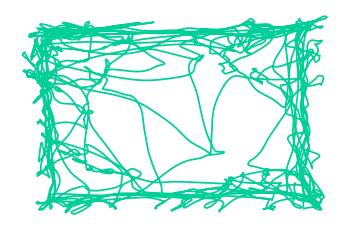

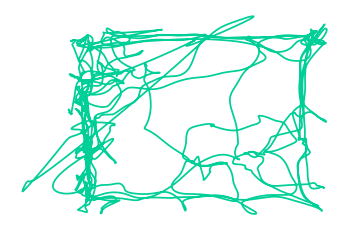

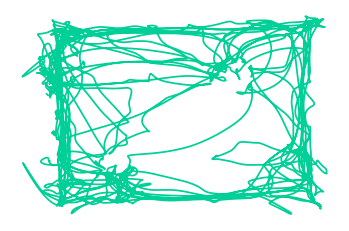

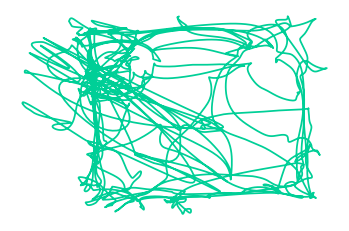

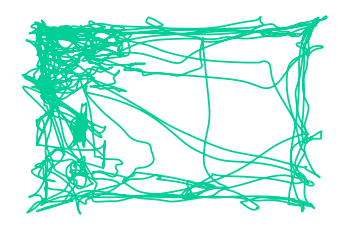

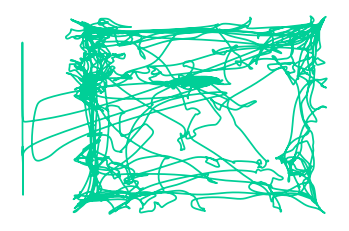

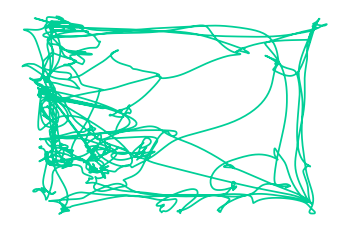

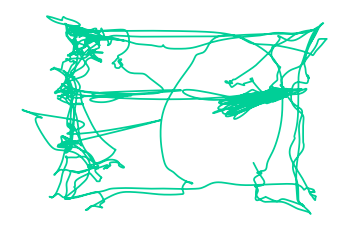

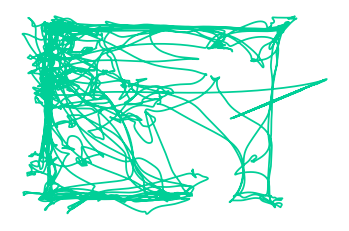

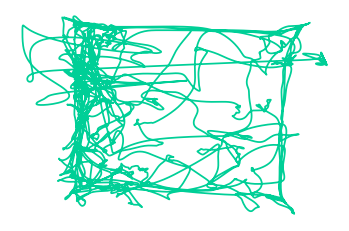

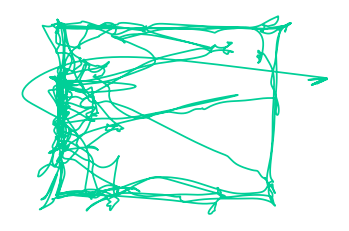

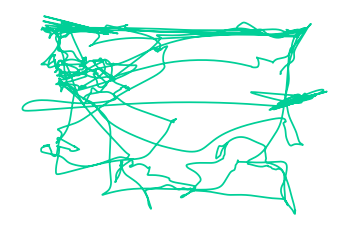

In [35]:
#streaker fam day 0
ax=plt.gca()
plt.plot(headPosStreakerFamDay0[:,0],headPosStreakerFamDay0[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker test day 0
ax=plt.gca()
plt.plot(headPosStreakerTestDay0[:,0],headPosStreakerTestDay0[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker fam day 1
ax=plt.gca()
plt.plot(headPosStreakerFamDay1[:,0],headPosStreakerFamDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker test day 1
ax=plt.gca()
plt.plot(headPosStreakerTestDay1[:,0],headPosStreakerTestDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker fam 1 day 2

ax=plt.gca()
plt.plot(headPosStreakerFam1Day2[:,0],headPosStreakerFam1Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker fam 2 day 2
ax=plt.gca()
plt.plot(headPosStreakerFam2Day2[:,0],headPosStreakerFam2Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker test 1 day 2
ax=plt.gca()
plt.plot(headPosStreakerTest1Day2[:,0],headPosStreakerTest1Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker test 2 day 2
ax=plt.gca()
plt.plot(headPosStreakerTest2Day2[:,0],headPosStreakerTest2Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker fam 1 day 3
ax=plt.gca()
plt.plot(headPosStreakerFam1Day3[:,0],headPosStreakerFam1Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker fam 2 day 3
ax=plt.gca()
plt.plot(headPosStreakerFam2Day3[:,0],headPosStreakerFam2Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker test 1 day 3
ax=plt.gca()
plt.plot(headPosStreakerTest1Day3[:,0],headPosStreakerTest1Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#streaker test 2 day 3
ax=plt.gca()
plt.plot(headPosStreakerTest2Day3[:,0],headPosStreakerTest2Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

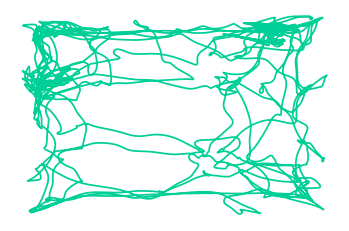

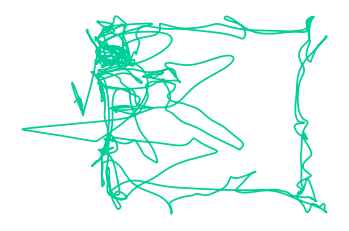

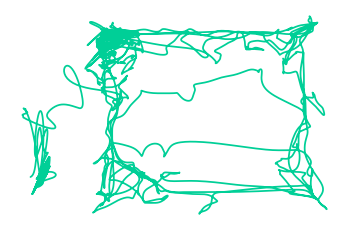

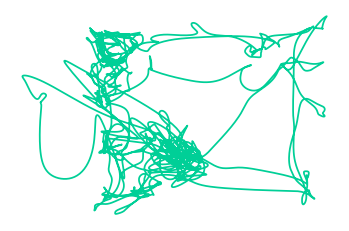

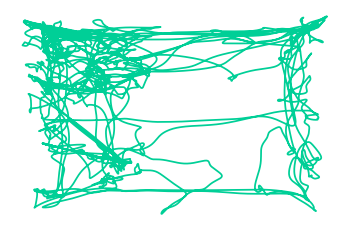

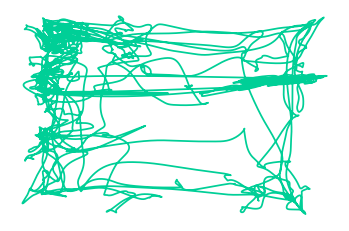

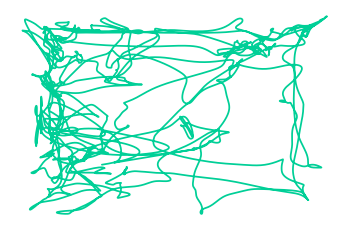

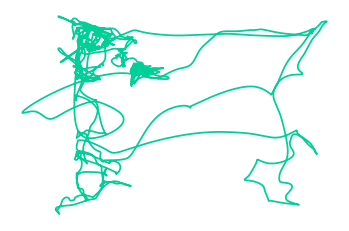

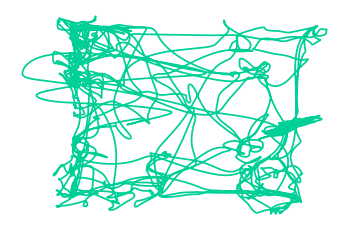

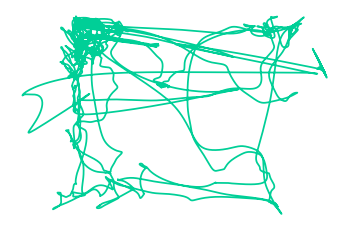

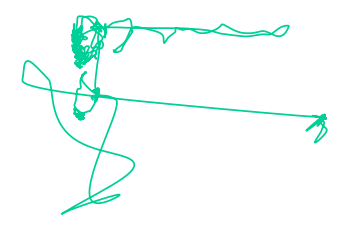

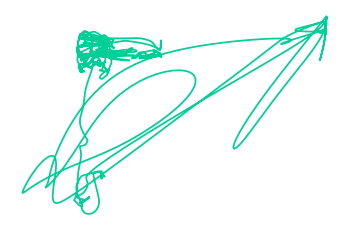

In [36]:
#squeaker fam day 0
ax=plt.gca()
plt.plot(headPosSqueakerFamDay0[:,0],headPosSqueakerFamDay0[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker test day 0
ax=plt.gca()
plt.plot(headPosSqueakerTestDay0[:,0],headPosSqueakerTestDay0[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker fam day 1
ax=plt.gca()
plt.plot(headPosSqueakerFamDay1[:,0],headPosSqueakerFamDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker test day 1
ax=plt.gca()
plt.plot(headPosSqueakerTestDay1[:,0],headPosSqueakerTestDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker fam 1 day 2

ax=plt.gca()
plt.plot(headPosSqueakerFam1Day2[:,0],headPosSqueakerFam1Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker fam 2 day 2
ax=plt.gca()
plt.plot(headPosSqueakerFam2Day2[:,0],headPosSqueakerFam2Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker test 1 day 2
ax=plt.gca()
plt.plot(headPosSqueakerTest1Day2[:,0],headPosSqueakerTest1Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker test 2 day 2
ax=plt.gca()
plt.plot(headPosSqueakerTest2Day2[:,0],headPosSqueakerTest2Day2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker fam 1 day 3
ax=plt.gca()
plt.plot(headPosSqueakerFam1Day3[:,0],headPosSqueakerFam1Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker fam 2 day 3
ax=plt.gca()
plt.plot(headPosSqueakerFam2Day3[:,0],headPosSqueakerFam2Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker test 1 day 3
ax=plt.gca()
plt.plot(headPosSqueakerTest1Day3[:,0],headPosSqueakerTest1Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#squeaker test 2 day 3
ax=plt.gca()
plt.plot(headPosSqueakerTest2Day3[:,0],headPosSqueakerTest2Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

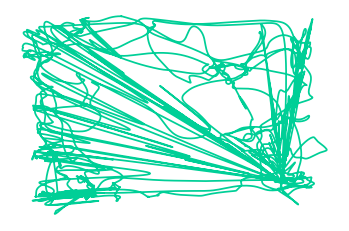

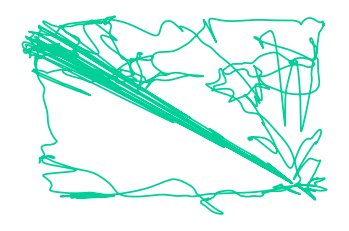

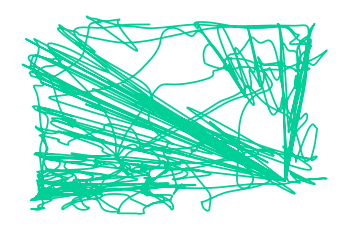

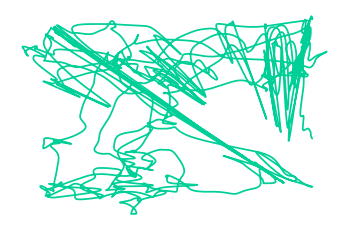

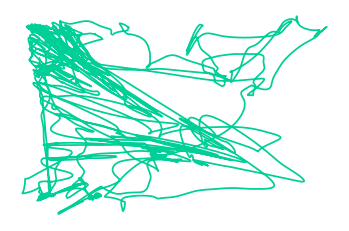

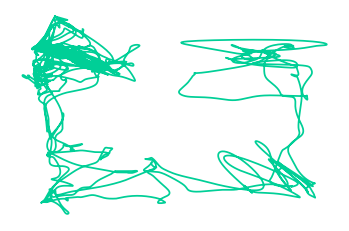

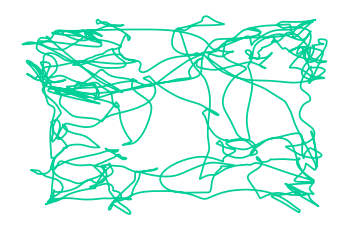

In [37]:
#island fam day 1
ax=plt.gca()
plt.plot(headPosIslandFamDay1[:,0],headPosIslandFamDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#island test day 1
ax=plt.gca()
plt.plot(headPosIslandTestDay1[:,0],headPosIslandTestDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#island fam day 2
ax=plt.gca()
plt.plot(headPosIslandFamDay2[:,0],headPosIslandFamDay2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#island test day 2
ax=plt.gca()
plt.plot(headPosIslandTestDay2[:,0],headPosIslandTestDay2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#island fam day 3
'''
ax=plt.gca()
plt.plot(headPosIslandFamDay3[:,0],headPosIslandFamDay3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
'''
#island test day 3
ax=plt.gca()
plt.plot(headPosIslandTestDay3[:,0],headPosIslandTestDay3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#island fam day 4
ax=plt.gca()
plt.plot(headPosIslandFamDay4[:,0],headPosIslandFamDay4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#island test day 4
ax=plt.gca()
plt.plot(headPosIslandTestDay4[:,0],headPosIslandTestDay4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

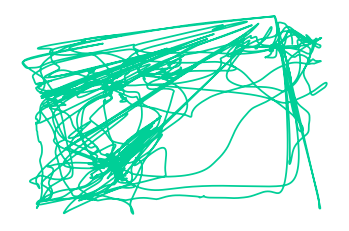

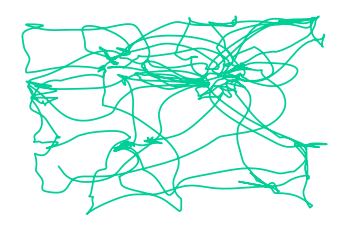

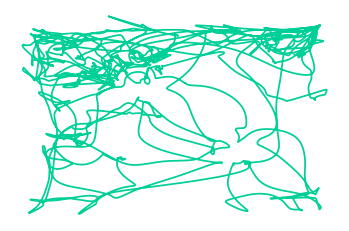

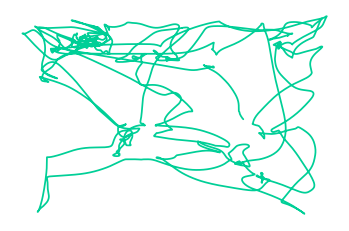

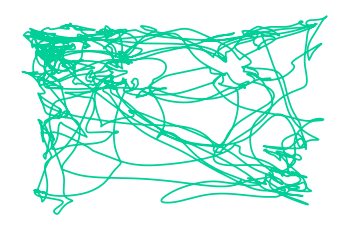

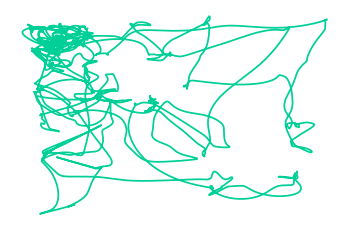

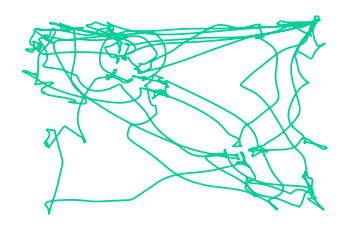

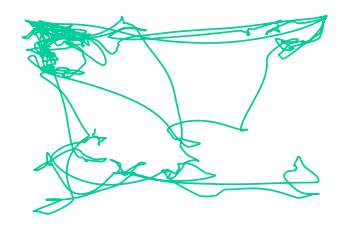

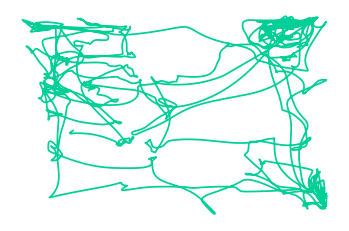

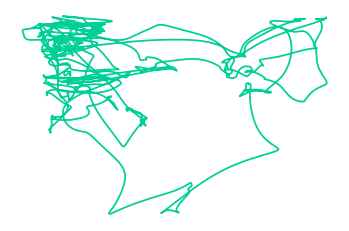

In [38]:
#june fam day 1
ax=plt.gca()
plt.plot(headPosJuneFamDay1[:,0],headPosJuneFamDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june test day 1
ax=plt.gca()
plt.plot(headPosJuneTestDay1[:,0],headPosJuneTestDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june fam day 2
ax=plt.gca()
plt.plot(headPosJuneFamDay2[:,0],headPosJuneFamDay2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june test day 2
ax=plt.gca()
plt.plot(headPosJuneTestDay2[:,0],headPosJuneTestDay2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june fam 1 day 3

ax=plt.gca()
plt.plot(headPosJuneFam1Day3[:,0],headPosJuneFam1Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june fam 2 day 3
ax=plt.gca()
plt.plot(headPosJuneFam2Day3[:,0],headPosJuneFam2Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june test 1 day 3
ax=plt.gca()
plt.plot(headPosJuneTest1Day3[:,0],headPosJuneTest1Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june test 2 day 3
ax=plt.gca()
plt.plot(headPosJuneTest2Day3[:,0],headPosJuneTest2Day3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june fam day 4
ax=plt.gca()
plt.plot(headPosJuneFamDay4[:,0],headPosJuneFamDay4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#june test day 4
ax=plt.gca()
plt.plot(headPosJuneTestDay4[:,0],headPosJuneTestDay4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

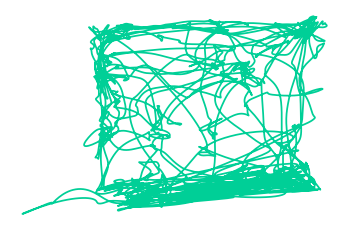

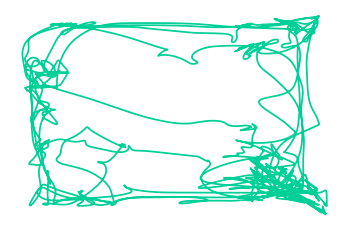

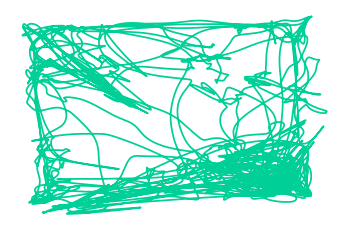

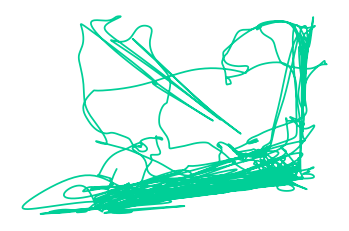

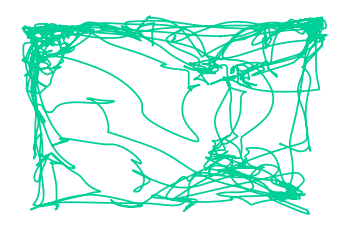

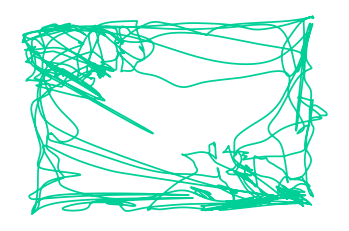

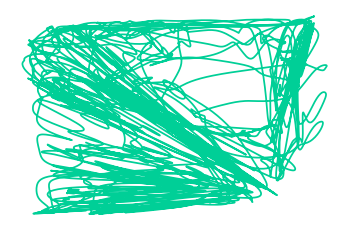

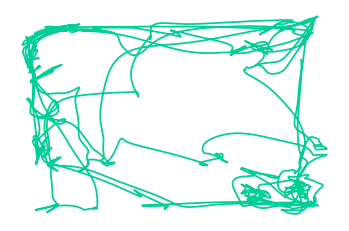

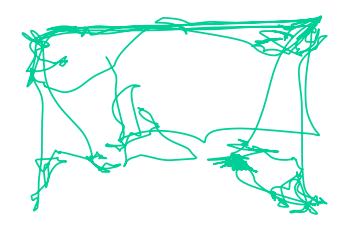

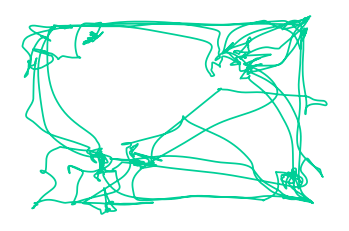

In [39]:
#FinalControl fam day 1
ax=plt.gca()
plt.plot(headPosFinalControlFamDay1[:,0],headPosFinalControlFamDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl test day 1
ax=plt.gca()
plt.plot(headPosFinalControlTestDay1[:,0],headPosFinalControlTestDay1[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl fam day 2
ax=plt.gca()
plt.plot(headPosFinalControlFamDay2[:,0],headPosFinalControlFamDay2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl test day 2
ax=plt.gca()
plt.plot(headPosFinalControlTestDay2[:,0],headPosFinalControlTestDay2[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl fam day 3
ax=plt.gca()
plt.plot(headPosFinalControlFamDay3[:,0],headPosFinalControlFamDay3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl test day 3
ax=plt.gca()
plt.plot(headPosFinalControlTestDay3[:,0],headPosFinalControlTestDay3[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl fam 1 day 4
ax=plt.gca()
plt.plot(headPosFinalControlFam1Day4[:,0],headPosFinalControlFam1Day4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl test 1 day 4
ax=plt.gca()
plt.plot(headPosFinalControlTest1Day4[:,0],headPosFinalControlTest1Day4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl fam 2 day 4
ax=plt.gca()
plt.plot(headPosFinalControlFam2Day4[:,0],headPosFinalControlFam2Day4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

#FinalControl test 2 day 4
ax=plt.gca()
plt.plot(headPosFinalControlTest2Day4[:,0],headPosFinalControlTest2Day4[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

In [40]:
# Streaker Speeds
AllSpeedsFam = np.append(speedStreakerFamDay0.data.squeeze(),speedStreakerFamDay1.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day3.data.squeeze())

AllSpeedsTest = np.append(speedStreakerTestDay0.data.squeeze(),speedStreakerTestDay1.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day3.data.squeeze())


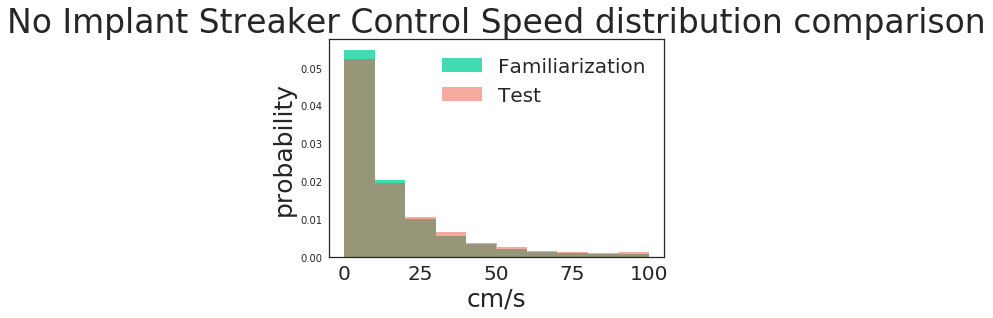

In [41]:
#Plot of streaker speed distribution
plt.title("No Implant Streaker Control Speed distribution comparison")
plt.hist(AllSpeedsFam[AllSpeedsFam<100],alpha=0.75,label="Familiarization",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<100],alpha=0.5,label="Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [42]:
# Squeaker Speeds
AllSpeedsFam = np.append(speedSqueakerFamDay0.data.squeeze(),speedSqueakerFamDay1.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day3.data.squeeze())

AllSpeedsTest = np.append(speedSqueakerTestDay0.data.squeeze(),speedSqueakerTestDay1.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day3.data.squeeze())


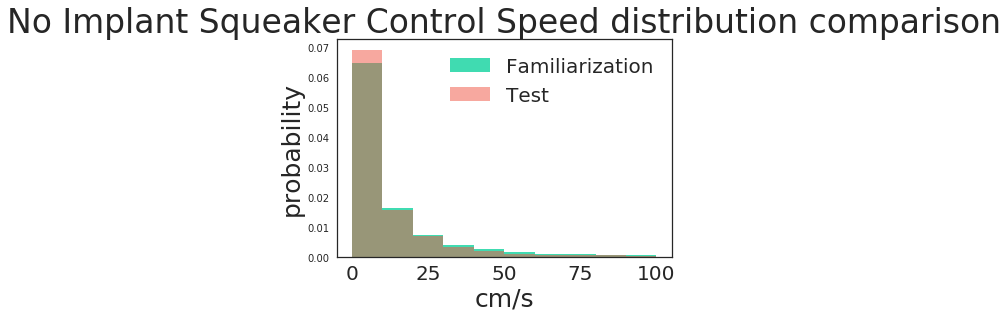

In [43]:
#Plot of squeaker speed distribution
plt.title("No Implant Squeaker Control Speed distribution comparison")
plt.hist(AllSpeedsFam[AllSpeedsFam<100],alpha=0.75,label="Familiarization",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<100],alpha=0.5,label="Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [44]:
AllSpeedsFam = np.append(speedIslandFamDay1.data.squeeze(),speedIslandFamDay2.data.squeeze())
#AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay4.data.squeeze())

AllSpeedsTest = np.append(speedIslandTestDay1.data.squeeze(), speedIslandTestDay2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay4.data.squeeze())

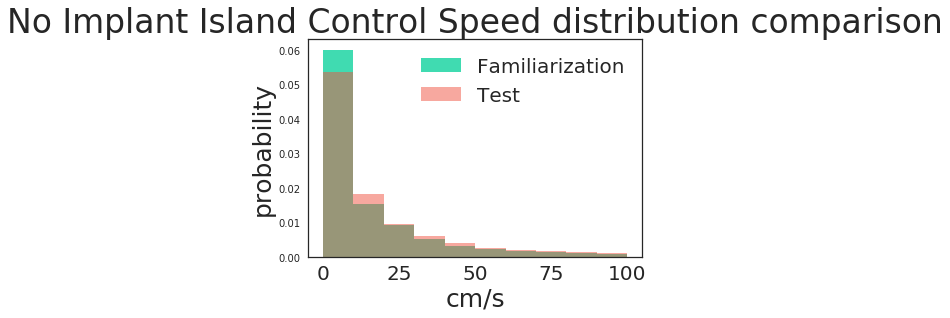

In [45]:
#Plot of island speed distribution
plt.title("No Implant Island Control Speed distribution comparison")
plt.hist(AllSpeedsFam[AllSpeedsFam<100],alpha=0.75,label="Familiarization",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<100],alpha=0.5,label="Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [46]:
AllSpeedsFam = np.append(speedJuneFamDay1.data.squeeze(),speedJuneFamDay2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam1Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam2Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay4.data.squeeze())

AllSpeedsTest = np.append(speedJuneTestDay1.data.squeeze(), speedJuneTestDay2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest1Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest2Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay4.data.squeeze())

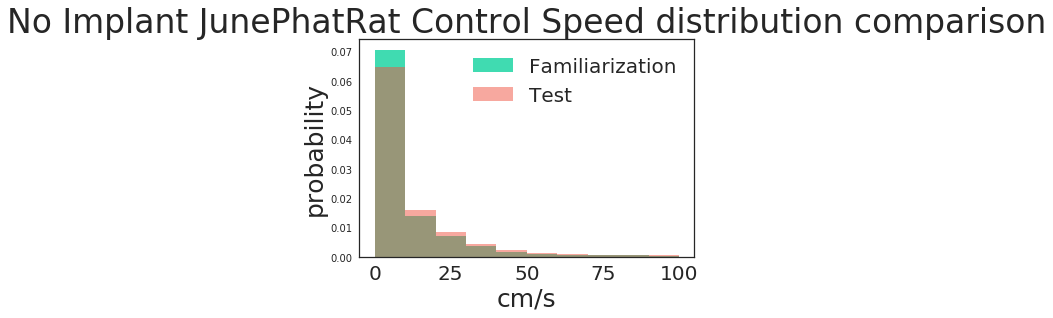

In [47]:
#june speed distribution
plt.title("No Implant JunePhatRat Control Speed distribution comparison")
plt.hist(AllSpeedsFam[AllSpeedsFam<100],alpha=0.75,label="Familiarization",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<100],alpha=0.5,label="Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [48]:
AllSpeedsFam = np.append(speedFinalControlFamDay1.data.squeeze(),speedFinalControlFamDay2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam1Day4.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam2Day4.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay5.data.squeeze())

AllSpeedsTest = np.append(speedFinalControlTestDay1.data.squeeze(), speedFinalControlTestDay2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest1Day4.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest2Day4.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay5.data.squeeze())

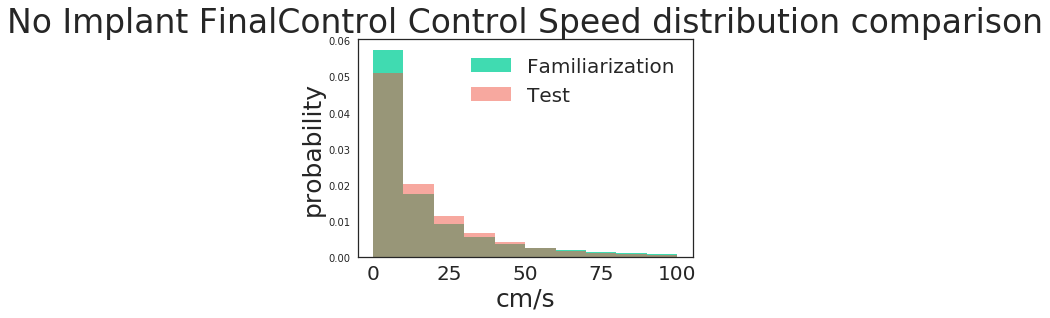

In [49]:
plt.title("No Implant FinalControl Control Speed distribution comparison")
plt.hist(AllSpeedsFam[AllSpeedsFam<100],alpha=0.75,label="Familiarization",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<100],alpha=0.5,label="Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [50]:
#now compare speeds across all rats, add on streaker speeds
AllSpeedsFam = np.append(speedStreakerFamDay0.data.squeeze(),speedStreakerFamDay1.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day3.data.squeeze())

AllSpeedsTest = np.append(speedStreakerTestDay0.data.squeeze(),speedStreakerTestDay1.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day3.data.squeeze())

#add on squeaker speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFamDay0.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFamDay1.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day3.data.squeeze())

AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTestDay0.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTestDay1.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day3.data.squeeze())

#add on island speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay1.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay2.data.squeeze())
#AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay4.data.squeeze())

AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay1.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay4.data.squeeze())

#add on june speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay1.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam1Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam2Day3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay4.data.squeeze())

AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay1.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest1Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest2Day3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay4.data.squeeze())

#add on final control speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay1.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay2.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay3.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam1Day4.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam2Day4.data.squeeze())
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay5.data.squeeze())

AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay1.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay2.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay3.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest1Day4.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest2Day4.data.squeeze())
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay5.data.squeeze())

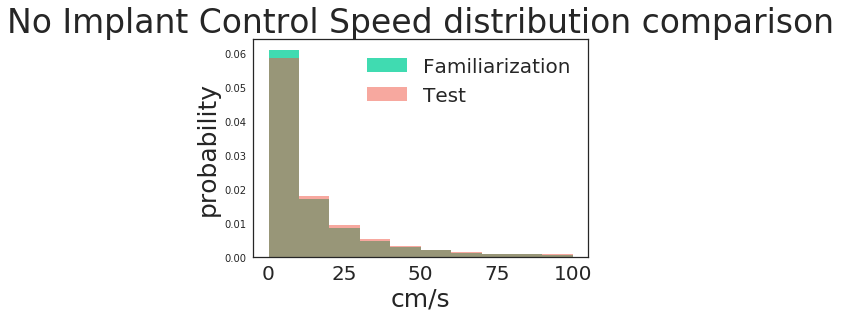

In [51]:
#Plot of speed distribution
plt.title("No Implant Control Speed distribution comparison")
plt.hist(AllSpeedsFam[AllSpeedsFam<100],alpha=0.75,label="Familiarization",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<100],alpha=0.5,label="Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [52]:
#Streaker first five minutes speeds
AllSpeedsFam = np.append(speedStreakerFamDay0.data.squeeze()[0:int(300*FPSStreakerFamDay0)],speedStreakerFamDay1.data.squeeze()[0:int(300*FPSStreakerFamDay1)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day2.data.squeeze()[0:int(300*FPSStreakerFam1Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day2.data.squeeze()[0:int(300*FPSStreakerFam2Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day3.data.squeeze()[0:int(300*FPSStreakerFam1Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day3.data.squeeze()[0:int(300*FPSStreakerFam2Day3)])

AllSpeedsTest = np.append(speedStreakerTestDay0.data.squeeze()[0:int(300*FPSStreakerTestDay0)],speedStreakerTestDay1.data.squeeze()[0:int(300*FPSStreakerTestDay1)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day2.data.squeeze()[0:int(300*FPSStreakerTest1Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day2.data.squeeze()[0:int(300*FPSStreakerTest2Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day3.data.squeeze()[0:int(300*FPSStreakerTest1Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day3.data.squeeze()[0:int(300*FPSStreakerTest2Day3)])

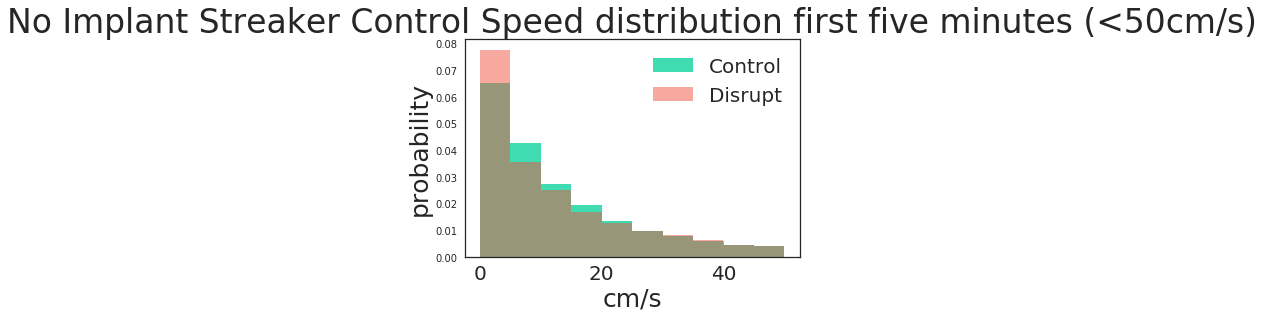

In [53]:
plt.title("No Implant Streaker Control Speed distribution first five minutes (<50cm/s)")
plt.hist(AllSpeedsFam[AllSpeedsFam<50],alpha=0.75,label="Control",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<50],alpha=0.5,label="Disrupt",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [54]:
#Squeaker first five minutes speeds
AllSpeedsFam = np.append(speedSqueakerFamDay0.data.squeeze()[0:int(300*FPSSqueakerFamDay0)],speedSqueakerFamDay1.data.squeeze()[0:int(300*FPSSqueakerFamDay1)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day2.data.squeeze()[0:int(300*FPSSqueakerFam1Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day2.data.squeeze()[0:int(300*FPSSqueakerFam2Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day3.data.squeeze()[0:int(300*FPSSqueakerFam1Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day3.data.squeeze()[0:int(300*FPSSqueakerFam2Day3)])

AllSpeedsTest = np.append(speedSqueakerTestDay0.data.squeeze()[0:int(300*FPSSqueakerTestDay0)],speedSqueakerTestDay1.data.squeeze()[0:int(300*FPSSqueakerTestDay1)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day2.data.squeeze()[0:int(300*FPSSqueakerTest1Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day2.data.squeeze()[0:int(300*FPSSqueakerTest2Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day3.data.squeeze()[0:int(300*FPSSqueakerTest1Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day3.data.squeeze()[0:int(300*FPSSqueakerTest2Day3)])

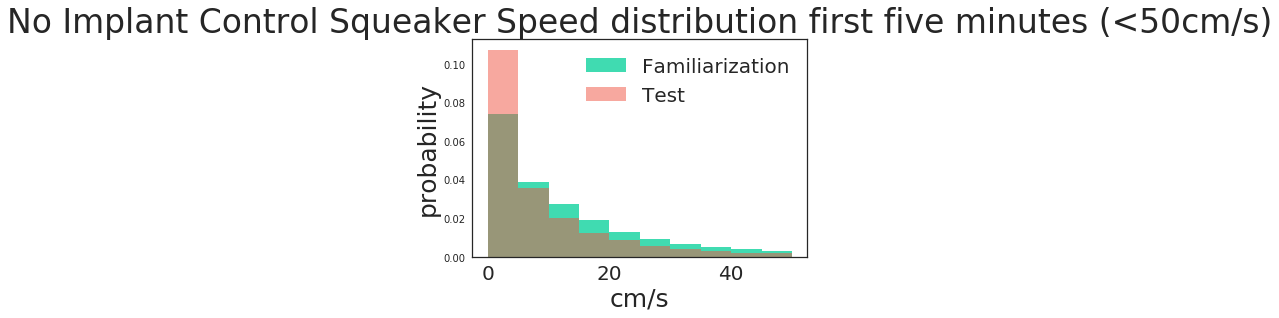

In [55]:
plt.title("No Implant Control Squeaker Speed distribution first five minutes (<50cm/s)")
plt.hist(AllSpeedsFam[AllSpeedsFam<50],alpha=0.75,label="Familiarization",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<50],alpha=0.5,label="Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [56]:
#island first five minutes speeds
AllSpeedsFam = np.append(speedIslandFamDay1.data.squeeze()[0:int(300*FPSIslandFamDay1)],speedIslandFamDay2.data.squeeze()[0:int(300*FPSIslandFamDay2)])
#AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay3.data.squeeze()[0:int(300*FPSIslandFamDay3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay4.data.squeeze()[0:int(300*FPSIslandFamDay4)])

AllSpeedsTest = np.append(speedIslandTestDay1.data.squeeze()[0:int(300*FPSIslandTestDay1)], speedIslandTestDay2.data.squeeze()[0:int(300*FPSIslandTestDay2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay3.data.squeeze()[0:int(300*FPSIslandTestDay3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay4.data.squeeze()[0:int(300*FPSIslandTestDay4)])

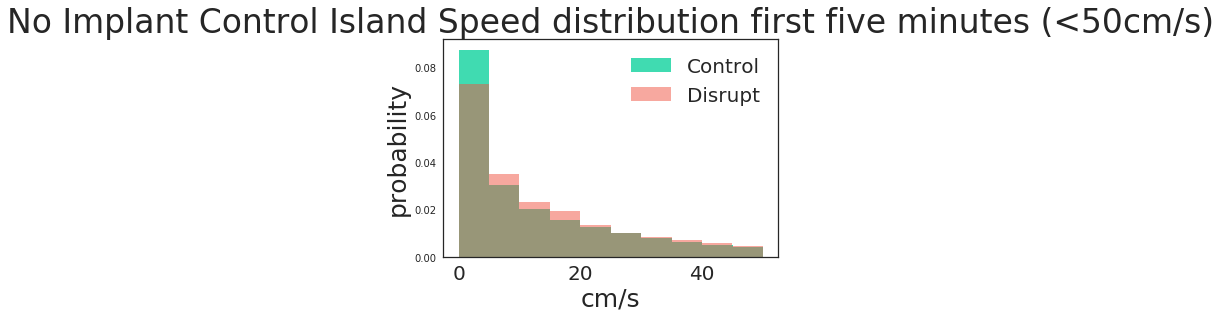

In [57]:
plt.title("No Implant Control Island Speed distribution first five minutes (<50cm/s)")
plt.hist(AllSpeedsFam[AllSpeedsFam<50],alpha=0.75,label="Control",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<50],alpha=0.5,label="Disrupt",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [58]:
#june first five minutes
AllSpeedsFam = np.append(speedJuneFamDay1.data.squeeze()[0:int(300*FPSJunePhatRatFamDay1)],speedJuneFamDay2.data.squeeze()[0:int(300*FPSJunePhatRatFamDay2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam1Day3.data.squeeze()[0:int(300*FPSJunePhatRatFam1Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam2Day3.data.squeeze()[0:int(300*FPSJunePhatRatFam2Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay4.data.squeeze()[0:int(300*FPSJunePhatRatFamDay4)])

AllSpeedsTest = np.append(speedJuneTestDay1.data.squeeze()[0:int(300*FPSJunePhatRatTestDay1)], speedJuneTestDay2.data.squeeze()[0:int(300*FPSJunePhatRatTestDay2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest1Day3.data.squeeze()[0:int(300*FPSJunePhatRatTest1Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest2Day3.data.squeeze()[0:int(300*FPSJunePhatRatTest2Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay4.data.squeeze()[0:int(300*FPSJunePhatRatTestDay4)])

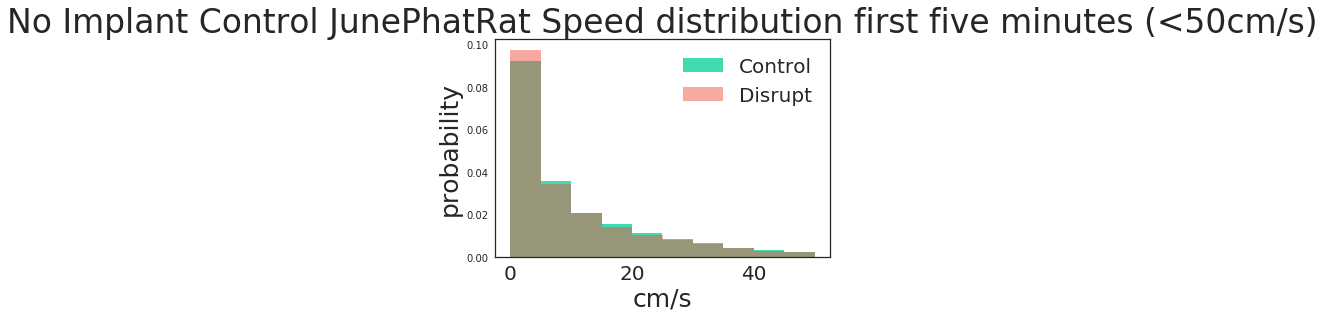

In [59]:
plt.title("No Implant Control JunePhatRat Speed distribution first five minutes (<50cm/s)")
plt.hist(AllSpeedsFam[AllSpeedsFam<50],alpha=0.75,label="Control",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<50],alpha=0.5,label="Disrupt",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [60]:
#FinalControl first five minutes speeds
AllSpeedsFam = np.append(speedFinalControlFamDay1.data.squeeze()[0:int(300*FPSFinalControlFamDay1)],speedFinalControlFamDay2.data.squeeze()[0:int(300*FPSFinalControlFamDay2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay3.data.squeeze()[0:int(300*FPSFinalControlFamDay3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam1Day4.data.squeeze()[0:int(300*FPSFinalControlFam1Day4)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam2Day4.data.squeeze()[0:int(300*FPSFinalControlFam2Day4)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay5.data.squeeze()[0:int(300*FPSFinalControlFamDay5)])

AllSpeedsTest = np.append(speedFinalControlTestDay1.data.squeeze()[0:int(300*FPSFinalControlTestDay1)], speedFinalControlTestDay2.data.squeeze()[0:int(300*FPSFinalControlTestDay2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay3.data.squeeze()[0:int(300*FPSFinalControlTestDay3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest1Day4.data.squeeze()[0:int(300*FPSFinalControlTest1Day4)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest2Day4.data.squeeze()[0:int(300*FPSFinalControlTest2Day4)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay5.data.squeeze()[0:int(300*FPSFinalControlTestDay5)])

In [61]:
#Now compare first five minutes speeds across all rats
#Streaker first five minutes speeds
AllSpeedsFam = np.append(speedStreakerFamDay0.data.squeeze()[0:int(300*FPSStreakerFamDay0)],speedStreakerFamDay1.data.squeeze()[0:int(300*FPSStreakerFamDay1)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day2.data.squeeze()[0:int(300*FPSStreakerFam1Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day2.data.squeeze()[0:int(300*FPSStreakerFam2Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam1Day3.data.squeeze()[0:int(300*FPSStreakerFam1Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedStreakerFam2Day3.data.squeeze()[0:int(300*FPSStreakerFam2Day3)])

AllSpeedsTest = np.append(speedStreakerTestDay0.data.squeeze()[0:int(300*FPSStreakerTestDay0)],speedStreakerTestDay1.data.squeeze()[0:int(300*FPSStreakerTestDay1)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day2.data.squeeze()[0:int(300*FPSStreakerTest1Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day2.data.squeeze()[0:int(300*FPSStreakerTest2Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest1Day3.data.squeeze()[0:int(300*FPSStreakerTest1Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedStreakerTest2Day3.data.squeeze()[0:int(300*FPSStreakerTest2Day3)])

#Add on squeaker first five minutes speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFamDay0.data.squeeze()[0:int(300*FPSSqueakerFamDay0)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFamDay1.data.squeeze()[0:int(300*FPSSqueakerFamDay1)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day2.data.squeeze()[0:int(300*FPSSqueakerFam1Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day2.data.squeeze()[0:int(300*FPSSqueakerFam2Day2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam1Day3.data.squeeze()[0:int(300*FPSSqueakerFam1Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedSqueakerFam2Day3.data.squeeze()[0:int(300*FPSSqueakerFam2Day3)])

AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTestDay0.data.squeeze()[0:int(300*FPSSqueakerTestDay0)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTestDay1.data.squeeze()[0:int(300*FPSSqueakerTestDay1)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day2.data.squeeze()[0:int(300*FPSSqueakerTest1Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day2.data.squeeze()[0:int(300*FPSSqueakerTest2Day2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest1Day3.data.squeeze()[0:int(300*FPSSqueakerTest1Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedSqueakerTest2Day3.data.squeeze()[0:int(300*FPSSqueakerTest2Day3)])

#Add on island first five minutes speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay1.data.squeeze()[0:int(300*FPSIslandFamDay1)])
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay2.data.squeeze()[0:int(300*FPSIslandFamDay2)])
#AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay3.data.squeeze()[0:int(300*FPSIslandFamDay3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedIslandFamDay4.data.squeeze()[0:int(300*FPSIslandFamDay4)])

AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay1.data.squeeze()[0:int(300*FPSIslandTestDay1)])
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay2.data.squeeze()[0:int(300*FPSIslandTestDay2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay3.data.squeeze()[0:int(300*FPSIslandTestDay3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedIslandTestDay4.data.squeeze()[0:int(300*FPSIslandTestDay4)])

#Add on june first five minutes speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay1.data.squeeze()[0:int(300*FPSJunePhatRatFamDay1)])
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay2.data.squeeze()[0:int(300*FPSJunePhatRatFamDay2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam1Day3.data.squeeze()[0:int(300*FPSJunePhatRatFam1Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFam2Day3.data.squeeze()[0:int(300*FPSJunePhatRatFam2Day3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedJuneFamDay4.data.squeeze()[0:int(300*FPSJunePhatRatFamDay4)])

AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay1.data.squeeze()[0:int(300*FPSJunePhatRatTestDay1)])
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay2.data.squeeze()[0:int(300*FPSJunePhatRatTestDay2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest1Day3.data.squeeze()[0:int(300*FPSJunePhatRatTest1Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTest2Day3.data.squeeze()[0:int(300*FPSJunePhatRatTest2Day3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedJuneTestDay4.data.squeeze()[0:int(300*FPSJunePhatRatTestDay4)])

#add on Final Control first five minutes speeds
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay1.data.squeeze()[0:int(300*FPSFinalControlFamDay1)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay2.data.squeeze()[0:int(300*FPSFinalControlFamDay2)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay3.data.squeeze()[0:int(300*FPSFinalControlFamDay3)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam1Day4.data.squeeze()[0:int(300*FPSFinalControlFam1Day4)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFam2Day4.data.squeeze()[0:int(300*FPSFinalControlFam2Day4)])
AllSpeedsFam = np.append(AllSpeedsFam, speedFinalControlFamDay5.data.squeeze()[0:int(300*FPSFinalControlFamDay5)])

AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay1.data.squeeze()[0:int(300*FPSFinalControlTestDay1)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay2.data.squeeze()[0:int(300*FPSFinalControlTestDay2)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay3.data.squeeze()[0:int(300*FPSFinalControlTestDay3)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest1Day4.data.squeeze()[0:int(300*FPSFinalControlTest1Day4)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTest2Day4.data.squeeze()[0:int(300*FPSFinalControlTest2Day4)])
AllSpeedsTest = np.append(AllSpeedsTest, speedFinalControlTestDay5.data.squeeze()[0:int(300*FPSFinalControlTestDay5)])


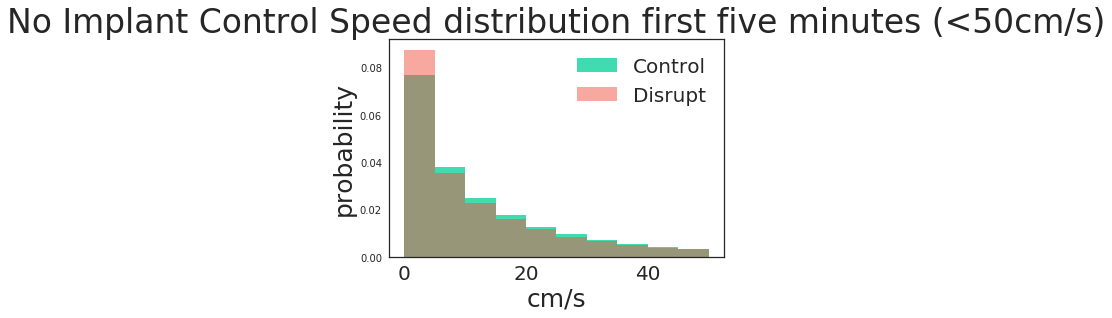

In [62]:
plt.title("No Implant Control Speed distribution first five minutes (<50cm/s)")
plt.hist(AllSpeedsFam[AllSpeedsFam<50],alpha=0.75,label="Control",density=True)
plt.hist(AllSpeedsTest[AllSpeedsTest<50],alpha=0.5,label="Disrupt",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [63]:
print((speedStreakerFamDay0.data.squeeze()))

[5.49314863 5.82538967 6.43834656 ... 3.49471533 3.22794693 3.07807063]


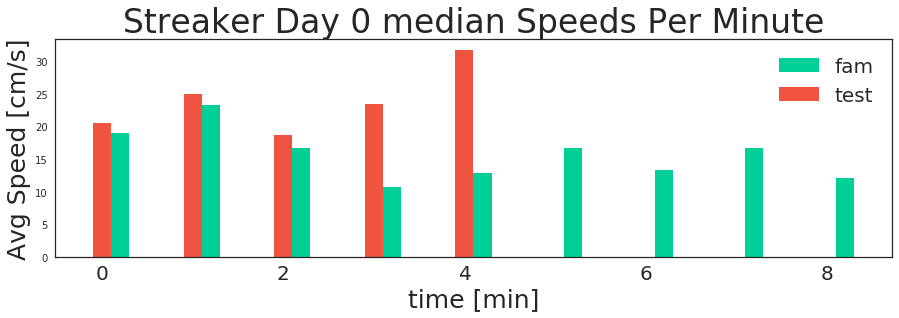

In [78]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 0 median Speeds Per Minute")

avgSpeedStreakerFamDay0 = []
for i in range(0,int(len(speedStreakerFamDay0.data.squeeze())/(60*FPSStreakerFamDay0))):
    avgSpeedStreakerFamDay0.append(np.median(speedStreakerFamDay0.data.squeeze()[int(i*60*FPSStreakerFamDay0):int(i*60*FPSStreakerFamDay0+60*FPSStreakerFamDay0)]))
avgSpeedStreakerFamDay0 = np.array(avgSpeedStreakerFamDay0)

avgSpeedStreakerTestDay0 = []
for i in range(0,int(len(speedStreakerTestDay0.data.squeeze())/(60*FPSStreakerTestDay0))):
    avgSpeedStreakerTestDay0.append(np.median(speedStreakerTestDay0.data.squeeze()[int(i*60*FPSStreakerTestDay0):int(i*60*FPSStreakerTestDay0+60*FPSStreakerTestDay0)]))
avgSpeedStreakerTestDay0 = np.array(avgSpeedStreakerTestDay0)

ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(speedStreakerFamDay0.data.squeeze())/(60*FPSStreakerFamDay0)))
y = np.arange(int(len(speedStreakerTestDay0.data.squeeze())/(60*FPSStreakerTestDay0)))
plt.bar(x+0.2, avgSpeedStreakerFamDay0, label = 'fam', width = 0.2)
plt.bar(y, avgSpeedStreakerTestDay0, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

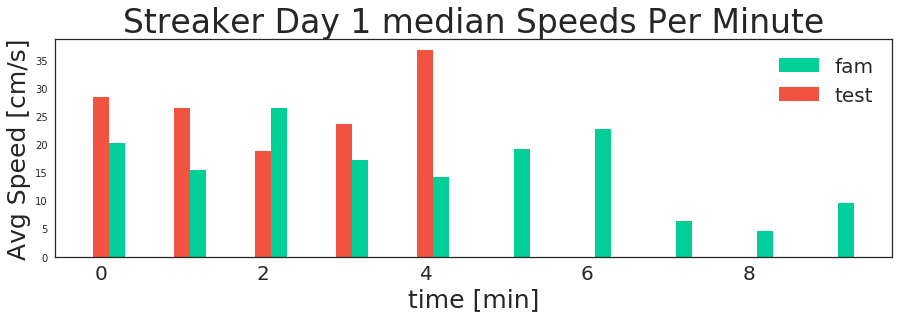

In [79]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 1 median Speeds Per Minute")

avgSpeedStreakerFamDay1 = []
for i in range(0,int(len(speedStreakerFamDay1.data.squeeze())/(60*FPSStreakerFamDay1))):
    avgSpeedStreakerFamDay1.append(np.median(speedStreakerFamDay1.data.squeeze()[int(i*60*FPSStreakerFamDay1):int(i*60*FPSStreakerFamDay1+60*FPSStreakerFamDay1)]))
avgSpeedStreakerFamDay1 = np.array(avgSpeedStreakerFamDay1)

avgSpeedStreakerTestDay1 = []
for i in range(0,int(len(speedStreakerTestDay1.data.squeeze())/(60*FPSStreakerTestDay1))):
    avgSpeedStreakerTestDay1.append(np.median(speedStreakerTestDay1.data.squeeze()[int(i*60*FPSStreakerTestDay1):int(i*60*FPSStreakerTestDay1+60*FPSStreakerTestDay1)]))
avgSpeedStreakerTestDay1 = np.array(avgSpeedStreakerTestDay1)

ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(speedStreakerFamDay1.data.squeeze())/(60*FPSStreakerFamDay1)))
y = np.arange(int(len(speedStreakerTestDay1.data.squeeze())/(60*FPSStreakerTestDay1)))
plt.bar(x+0.2, avgSpeedStreakerFamDay1, label = 'fam', width = 0.2)
plt.bar(y, avgSpeedStreakerTestDay1, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

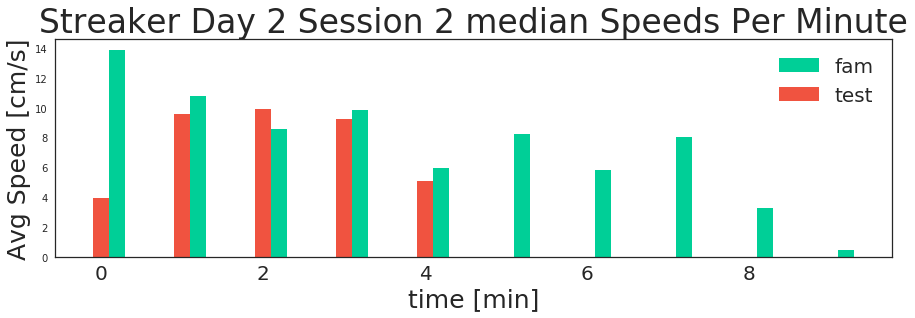

In [80]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 2 Session 2 median Speeds Per Minute")

#npl.plot(speedStreakerFam1Day2, label = 'Fam')
#npl.plot(speedStreakerTest1Day2, label = 'Test')

avgSpeedStreakerFam1Day2 = []
for i in range(0,int(len(speedStreakerFam1Day2.data.squeeze())/(60*FPSStreakerFam1Day2))):
    avgSpeedStreakerFam1Day2.append(np.median(speedStreakerFam1Day2.data.squeeze()[int(i*60*FPSStreakerFam1Day2):int(i*60*FPSStreakerFam1Day2+60*FPSStreakerFam1Day2)]))
avgSpeedStreakerFam1Day2 = np.array(avgSpeedStreakerFam1Day2)

avgSpeedStreakerTest1Day2 = []
for i in range(0,int(len(speedStreakerTest1Day2.data.squeeze())/(60*FPSStreakerTest1Day2))):
    avgSpeedStreakerTest1Day2.append(np.median(speedStreakerTest1Day2.data.squeeze()[int(i*60*FPSStreakerTest1Day2):int(i*60*FPSStreakerTest1Day2+60*FPSStreakerTest1Day2)]))
avgSpeedStreakerTest1Day2 = np.array(avgSpeedStreakerTest1Day2)

ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(speedStreakerFam1Day2.data.squeeze())/(60*FPSStreakerFam1Day2)))
y = np.arange(int(len(speedStreakerTest1Day2.data.squeeze())/(60*FPSStreakerTest1Day2)))
plt.bar(x+0.2, avgSpeedStreakerFam1Day2, label = 'fam', width = 0.2)
plt.bar(y, avgSpeedStreakerTest1Day2, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

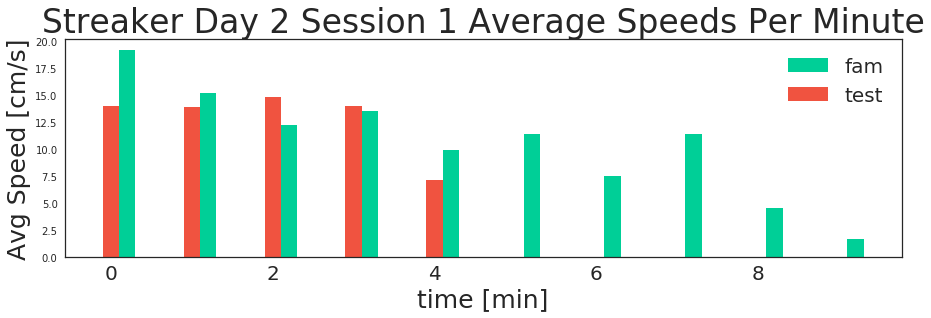

In [81]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 2 Session 1 Average Speeds Per Minute")

#npl.plot(speedStreakerFam1Day2, label = 'Fam')
#npl.plot(speedStreakerTest1Day2, label = 'Test')

avgSpeedStreakerFam1Day2 = []
for i in range(0,int(len(speedStreakerFam1Day2.data.squeeze())/(60*FPSStreakerFam1Day2))):
    avgSpeedStreakerFam1Day2.append(np.average(speedStreakerFam1Day2.data.squeeze()[int(i*60*FPSStreakerFam1Day2):int(i*60*FPSStreakerFam1Day2+60*FPSStreakerFam1Day2)]))
avgSpeedStreakerFam1Day2 = np.array(avgSpeedStreakerFam1Day2)

avgSpeedStreakerTest1Day2 = []
for i in range(0,int(len(speedStreakerTest1Day2.data.squeeze())/(60*FPSStreakerTest1Day2))):
    avgSpeedStreakerTest1Day2.append(np.average(speedStreakerTest1Day2.data.squeeze()[int(i*60*FPSStreakerTest1Day2):int(i*60*FPSStreakerTest1Day2+60*FPSStreakerTest1Day2)]))
avgSpeedStreakerTest1Day2 = np.array(avgSpeedStreakerTest1Day2)

ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(speedStreakerFam1Day2.data.squeeze())/(60*FPSStreakerFam1Day2)))
y = np.arange(int(len(speedStreakerTest1Day2.data.squeeze())/(60*FPSStreakerTest1Day2)))
plt.bar(x+0.2, avgSpeedStreakerFam1Day2, label = 'fam', width = 0.2)
plt.bar(y, avgSpeedStreakerTest1Day2, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

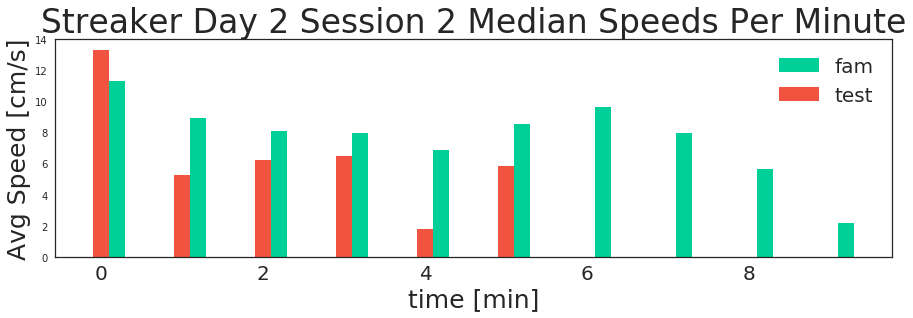

In [82]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 2 Session 2 Median Speeds Per Minute")


avgSpeedStreakerFam2Day2 = []
for i in range(0,int(len(speedStreakerFam2Day2.data.squeeze())/(60*FPSStreakerFam2Day2))):
    avgSpeedStreakerFam2Day2.append(np.median(speedStreakerFam2Day2.data.squeeze()[int(i*60*FPSStreakerFam2Day2):int(i*60*FPSStreakerFam2Day2+60*FPSStreakerFam2Day2)]))
avgSpeedStreakerFam2Day2 = np.array(avgSpeedStreakerFam2Day2)

avgSpeedStreakerTest2Day2 = []
for i in range(0,int(len(speedStreakerTest2Day2.data.squeeze())/(60*FPSStreakerTest2Day2))):
    avgSpeedStreakerTest2Day2.append(np.median(speedStreakerTest2Day2.data.squeeze()[int(i*60*FPSStreakerTest2Day2):int(i*60*FPSStreakerTest2Day2+60*FPSStreakerTest2Day2)]))
avgSpeedStreakerTest2Day2 = np.array(avgSpeedStreakerTest2Day2)

ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(speedStreakerFam2Day2.data.squeeze())/(60*FPSStreakerFam2Day2)))
y = np.arange(int(len(speedStreakerTest2Day2.data.squeeze())/(60*FPSStreakerTest2Day2)))
plt.bar(x+0.2, avgSpeedStreakerFam2Day2, label = 'fam', width = 0.2)
plt.bar(y, avgSpeedStreakerTest2Day2, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

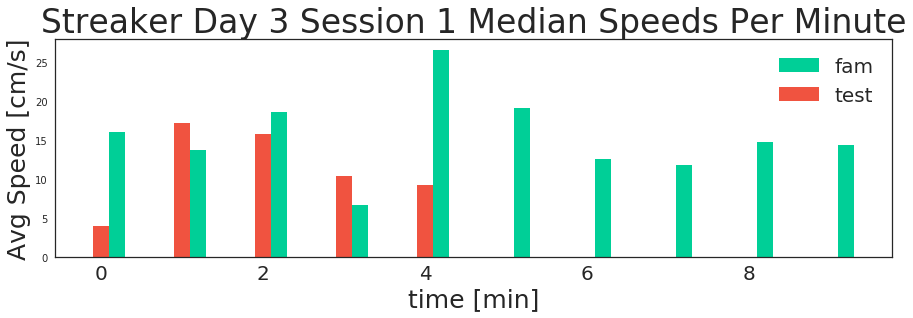

In [83]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 3 Session 1 Median Speeds Per Minute")


avgSpeedStreakerFam1Day3 = []
for i in range(0,int(len(speedStreakerFam1Day3.data.squeeze())/(60*FPSStreakerFam1Day3))):
    avgSpeedStreakerFam1Day3.append(np.median(speedStreakerFam1Day3.data.squeeze()[int(i*60*FPSStreakerFam1Day3):int(i*60*FPSStreakerFam1Day3+60*FPSStreakerFam1Day3)]))
avgSpeedStreakerFam1Day3 = np.array(avgSpeedStreakerFam1Day3)

avgSpeedStreakerTest1Day3 = []
for i in range(0,int(len(speedStreakerTest1Day3.data.squeeze())/(60*FPSStreakerTest1Day3))):
    avgSpeedStreakerTest1Day3.append(np.median(speedStreakerTest1Day3.data.squeeze()[int(i*60*FPSStreakerTest1Day3):int(i*60*FPSStreakerTest1Day3+60*FPSStreakerTest1Day3)]))
avgSpeedStreakerTest1Day3 = np.array(avgSpeedStreakerTest1Day3)

ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(speedStreakerFam1Day3.data.squeeze())/(60*FPSStreakerFam1Day3)))
y = np.arange(int(len(speedStreakerTest1Day3.data.squeeze())/(60*FPSStreakerTest1Day3)))
plt.bar(x+0.2, avgSpeedStreakerFam1Day3, label = 'fam', width = 0.2)
plt.bar(y, avgSpeedStreakerTest1Day3, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

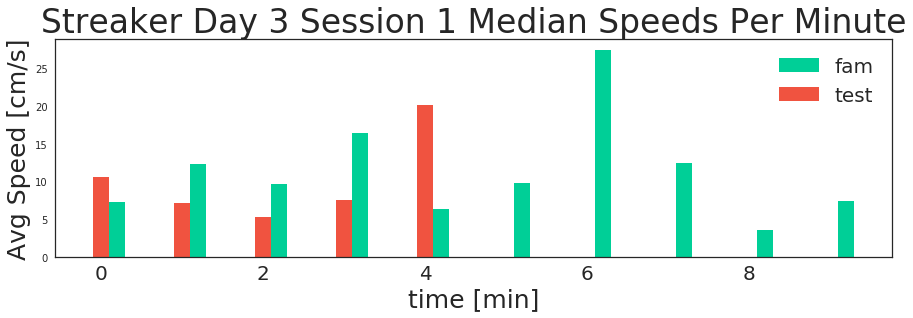

In [121]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 3 Session 1 Median Speeds Per Minute")


avgSpeedStreakerFam2Day3 = []
for i in range(0,int(len(speedStreakerFam2Day3.data.squeeze())/(60*FPSStreakerFam2Day3))):
    avgSpeedStreakerFam2Day3.append(np.median(speedStreakerFam2Day3.data.squeeze()[int(i*60*FPSStreakerFam2Day3):int(i*60*FPSStreakerFam2Day3+60*FPSStreakerFam2Day3)]))
avgSpeedStreakerFam2Day3 = np.array(avgSpeedStreakerFam2Day3)

avgSpeedStreakerTest2Day3 = []
for i in range(0,int(len(speedStreakerTest2Day3.data.squeeze())/(60*FPSStreakerTest2Day3))):
    avgSpeedStreakerTest2Day3.append(np.median(speedStreakerTest2Day3.data.squeeze()[int(i*60*FPSStreakerTest2Day3):int(i*60*FPSStreakerTest2Day3+60*FPSStreakerTest2Day3)]))
avgSpeedStreakerTest2Day3 = np.array(avgSpeedStreakerTest2Day3)

ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(speedStreakerFam2Day3.data.squeeze())/(60*FPSStreakerFam2Day3)))
y = np.arange(int(len(speedStreakerTest2Day3.data.squeeze())/(60*FPSStreakerTest2Day3)))
plt.bar(x+0.2, avgSpeedStreakerFam2Day3, label = 'fam', width = 0.2)
plt.bar(y, avgSpeedStreakerTest2Day3, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

10
6
[13.380745515884213]
[13.380745515884213, 12.312485491332765]
[13.380745515884213, 12.312485491332765, 12.053280480329448]
[13.380745515884213, 12.312485491332765, 12.053280480329448, 10.337807929045152]
[13.380745515884213, 12.312485491332765, 12.053280480329448, 10.337807929045152, 9.566962600516135]
[13.380745515884213, 12.312485491332765, 12.053280480329448, 10.337807929045152, 9.566962600516135, 11.167710856858287]
[13.380745515884213, 12.312485491332765, 12.053280480329448, 10.337807929045152, 9.566962600516135, 11.167710856858287, 12.102208209073474]
[13.380745515884213, 12.312485491332765, 12.053280480329448, 10.337807929045152, 9.566962600516135, 11.167710856858287, 12.102208209073474, 9.98229430484902]
[13.380745515884213, 12.312485491332765, 12.053280480329448, 10.337807929045152, 9.566962600516135, 11.167710856858287, 12.102208209073474, 9.98229430484902, 5.82806546754618]
[13.380745515884213, 12.312485491332765, 12.053280480329448, 10.337807929045152, 9.56696260051613

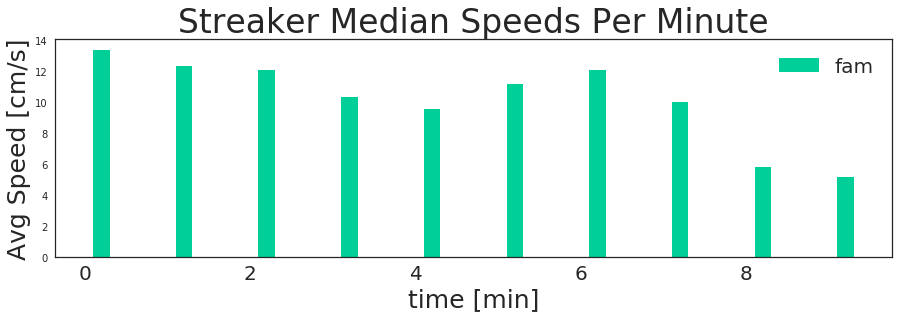

In [123]:
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Median Speeds Per Minute")

avgFamSpeedStreaker = []
avgTestSpeedStreaker = []
maxFamVidLength = max(int(len(speedStreakerFamDay1.data.squeeze())/(60*FPSStreakerFamDay1)),int(len(speedStreakerFam1Day3.data.squeeze())/(60*FPSStreakerFam1Day3)),int(len(speedStreakerFam2Day2.data.squeeze())/(60*FPSStreakerFam2Day2)),int(len(speedStreakerFam1Day2.data.squeeze())/(60*FPSStreakerFam1Day2)),int(len(speedStreakerFamDay1.data.squeeze())/(60*FPSStreakerFamDay1)),int(len(speedStreakerFamDay0.data.squeeze())/(60*FPSStreakerFamDay0)))
print(maxFamVidLength)

maxTestVidLength = max(int(len(speedStreakerTestDay1.data.squeeze())/(60*FPSStreakerTestDay1)),int(len(speedStreakerTest1Day3.data.squeeze())/(60*FPSStreakerTest1Day3)),int(len(speedStreakerTest2Day2.data.squeeze())/(60*FPSStreakerTest2Day2)),int(len(speedStreakerTest1Day2.data.squeeze())/(60*FPSStreakerTest1Day2)),int(len(speedStreakerTestDay1.data.squeeze())/(60*FPSStreakerTestDay1)),int(len(speedStreakerTestDay0.data.squeeze())/(60*FPSStreakerTestDay0)))
print(maxTestVidLength)

for i in range(0, maxFamVidLength):
        ithFamSpeedStreaker = np.concatenate([speedStreakerFamDay0.data.squeeze()[int(i*60*FPSStreakerFamDay0):int(i*60*FPSStreakerFamDay0+60*FPSStreakerFamDay0)],speedStreakerFamDay1.data.squeeze()[int(i*60*FPSStreakerFamDay1):int(i*60*FPSStreakerFamDay1+60*FPSStreakerFamDay1)]])
        ithFamSpeedStreaker = np.concatenate([ithFamSpeedStreaker, speedStreakerFam1Day2.data.squeeze()[int(i*60*FPSStreakerFam1Day2):int(i*60*FPSStreakerFam1Day2+60*FPSStreakerFam1Day2)]])
        ithFamSpeedStreaker = np.concatenate([ithFamSpeedStreaker, speedStreakerFam2Day2.data.squeeze()[int(i*60*FPSStreakerFam2Day2):int(i*60*FPSStreakerFam2Day2+60*FPSStreakerFam2Day2)]])
        ithFamSpeedStreaker = np.concatenate([ithFamSpeedStreaker, speedStreakerFam1Day3.data.squeeze()[int(i*60*FPSStreakerFam1Day3):int(i*60*FPSStreakerFam1Day3+60*FPSStreakerFam1Day3)]])
        ithFamSpeedStreaker = np.concatenate([ithFamSpeedStreaker, speedStreakerFam2Day3.data.squeeze()[int(i*60*FPSStreakerFam2Day3):int(i*60*FPSStreakerFam2Day3+60*FPSStreakerFam2Day3)]])
        avgFamSpeedStreaker.append(np.median(ithFamSpeedStreaker))
        print(avgFamSpeedStreaker)
        
ax = plt.gca()
ax.set_xlabel('time [min]')
ax.set_ylabel('Avg Speed [cm/s]')
x = np.arange(int(len(avgFamSpeedStreaker)))
#y = np.arange(int(len(avgTestSpeedStreaker)))
plt.bar(x+0.2, avgFamSpeedStreaker, label = 'fam', width = 0.2)
#plt.bar(y, avgTestSpeedStreaker, label = 'test', width = 0.2)
plt.legend()
plt.show()
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)   


In [ ]:
maxTestVidLength = max(int(len(speedStreakerTestDay1.data.squeeze())/(60*FPSStreakerTestDay1)),int(len(speedStreakerTest1Day3.data.squeeze())/(60*FPSStreakerTest1Day3)),int(len(speedStreakerTest2Day2.data.squeeze())/(60*FPSStreakerTest2Day2)),int(len(speedStreakerTest1Day2.data.squeeze())/(60*FPSStreakerTest1Day2)),int(len(speedStreakerTestDay1.data.squeeze())/(60*FPSStreakerTestDay1)),int(len(speedStreakerTestDay0.data.squeeze())/(60*FPSStreakerTestDay0)))


In [ ]:
ithFamSpeedStreaker = np.concatenate([ithFamSpeedStreaker, speedStreakerFam2Day3.data.squeeze()[int(i*60*FPSStreakerFam2Day3):int(i*60*FPSStreakerFam2Day3+60*FPSStreakerFam2Day3)]])

# Instantaneous Speed

In [ ]:
#streaker day 0
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 0 Instantaneous Speeds")

npl.plot(speedStreakerFamDay0, label = 'Fam')
npl.plot(speedStreakerTestDay0, label = 'Test')
avgSpeedStreakerFamDay0 = []
for i in range(0,len(speedStreakerFamDay0)/60):
    avgSpeedStreakerFamDay0.append(np.average(speedStreakerFamDay0[i*60:i*60+60]))
plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#streaker day 1
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 1 Instantaneous Speeds")

npl.plot(speedStreakerFamDay1, label = 'Fam')
npl.plot(speedStreakerTestDay1, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#streaker day 2
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 2 Instantaneous Speeds")

npl.plot(speedStreakerFam1Day2, label = 'Fam1')
npl.plot(speedStreakerTest1Day2, label = 'Test1')
npl.plot(speedStreakerFam2Day2, label = 'Fam2')
npl.plot(speedStreakerTest2Day2, label = 'Test2')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#Streaker day 3
fig = plt.figure(figsize = (15,4))
plt.title("Streaker Day 3 Instantaneous Speeds")

npl.plot(speedStreakerFam1Day3, label = 'Fam1')
npl.plot(speedStreakerTest1Day3, label = 'Test1')
npl.plot(speedStreakerFam2Day3, label = 'Fam2')
npl.plot(speedStreakerTest2Day3, label = 'Test2')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

In [ ]:
#squeaker day 0
fig = plt.figure(figsize = (15,4))
plt.title("Squeaker Day 0 Instantaneous Speeds")

npl.plot(speedSqueakerFamDay0, label = 'Fam')
npl.plot(speedSqueakerTestDay0, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#squeaker day 1
fig = plt.figure(figsize = (15,4))
plt.title("Squeaker Day 1 Instantaneous Speeds")

npl.plot(speedSqueakerFamDay1, label = 'Fam')
npl.plot(speedSqueakerTestDay1, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#squeaker day 2
fig = plt.figure(figsize = (15,4))
plt.title("Squeaker Day 2 Instantaneous Speeds")

npl.plot(speedSqueakerFam1Day2, label = 'Fam1')
npl.plot(speedSqueakerTest1Day2, label = 'Test1')
npl.plot(speedSqueakerFam2Day2, label = 'Fam2')
npl.plot(speedSqueakerTest2Day2, label = 'Test2')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
#ax.set_ylim
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#squeaker day 3
fig = plt.figure(figsize = (15,4))
plt.title("Squeaker Day 3 Instantaneous Speeds")

npl.plot(speedSqueakerFam1Day3, label = 'Fam1')
npl.plot(speedSqueakerTest1Day3, label = 'Test1')
npl.plot(speedSqueakerFam1Day3, label = 'Fam2')
npl.plot(speedSqueakerTest1Day3, label = 'Test2')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

In [ ]:
#island day 1
fig = plt.figure(figsize = (15,4))
plt.title("Island Day 1 Instantaneous Speeds")

npl.plot(speedIslandFamDay1, label = 'Fam')
npl.plot(speedIslandTestDay1, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#island day 2
fig = plt.figure(figsize = (15,4))
plt.title("Island Day 2 Instantaneous Speeds")

npl.plot(speedIslandFamDay2, label = 'Fam')
npl.plot(speedIslandTestDay2, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#island day 3
fig = plt.figure(figsize = (15,4))
plt.title("Island Day 3 Instantaneous Speeds")

#npl.plot(speedIslandFamDay3, label = 'Fam')
npl.plot(speedIslandTestDay3, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#island day 4
fig = plt.figure(figsize = (15,4))
plt.title("Island Day 4 Instantaneous Speeds")

npl.plot(speedIslandFamDay4, label = 'Fam')
npl.plot(speedIslandTestDay4, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

In [ ]:
#june day 1
fig = plt.figure(figsize = (15,4))
plt.title("June Day 1 Instantaneous Speeds")

npl.plot(speedJuneFamDay1, label = 'Fam')
npl.plot(speedJuneTestDay1, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#june day 2
fig = plt.figure(figsize = (15,4))
plt.title("June Day 2 Instantaneous Speeds")

npl.plot(speedJuneFamDay2, label = 'Fam')
npl.plot(speedJuneTestDay2, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#june day 3
fig = plt.figure(figsize = (15,4))
plt.title("June Day 3 Instantaneous Speeds")

npl.plot(speedJuneFam1Day3, label = 'Fam')
npl.plot(speedJuneTest1Day3, label = 'Test')
npl.plot(speedJuneFam2Day3, label = 'Fam')
npl.plot(speedJuneTest2Day3, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

#june day 4
fig = plt.figure(figsize = (15,4))
plt.title("June Day 4 Instantaneous Speeds")

npl.plot(speedJuneFamDay4, label = 'Fam')
npl.plot(speedJuneTestDay4, label = 'Test')

plt.legend()
ax = plt.gca()
ax.set_xlabel('time [s]')
ax.set_ylabel('Instantaneous Speed [cm/s]')
npl.utils.clear_right(ax)
npl.utils.clear_top(ax)

In [ ]:
#old shay code

# Woodrow head positions
headPosWoodrow3_28_19DisruptFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-28-19/headCoordsFam.npz")['headLoc']
headPosWoodrow3_29_19DisruptFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-29-19/headCoordsFam.npz")['headLoc']
headPosWoodrow3_30_19DisruptFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-30-19/headCoordsFam.npz")['headLoc']

headPosWoodrow3_31_19ControlFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Control/3-31-19/headCoordsFam.npz")['headLoc']

headPosWoodrow3_28_19DisruptTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-28-19/headCoordsTest.npz")['headLoc']
headPosWoodrow3_29_19DisruptTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-29-19/headCoordsTest.npz")['headLoc']
headPosWoodrow3_30_19DisruptTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-30-19/headCoordsTest.npz")['headLoc']

headPosWoodrow3_31_19ControlTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Control/3-31-19/headCoordsTest.npz")['headLoc']

# Webby head positions
headPosWebbyDay0DisruptFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day0/headCoordsFam.npz")['headLoc']
headPosWebbyDay1DisruptFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day1/disruption/headCoordsFam.npz")['headLoc']

headPosWebbyDay1ControlFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day1/control/headCoordsFam.npz")['headLoc']
headPosWebbyDay3ControlFam = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day3/control/headCoordsFam.npz")['headLoc']

headPosWebbyDay0DisruptTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day0/headcoordsTest.npz")["headPos"]
headPosWebbyDay1DisruptTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day1/disruption/headcoords.npz")["headPos"]

headPosWebbyDay1ControlTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day1/control/headcoords.npz")["headPos"]
headPosWebbyDay3ControlTest = np.load("/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day3/control/headcoords.npz")["headPos"]

In [ ]:
# old shay code
#let's go ahead and find all homographies. We'll have all head coords in cm after this cell


woodrow3_28_19 = [[560,73], [243,97], [191,379], [503,456]]
woodrow3_29_19 = [[541,438], [207,365], [263,72], [582,79]]
woodrow3_30_19 = [[219,373], [562,439], [590,81], [271,81]]
woodrow3_31_19 = [[222,370], [562,438], [589,77], [271,79]]

webbyDay0 = [[80,134], [395,81], [453,414], [116,457]]
webbyDay1 = [[50,21], [392,58], [366,389], [20,367]]
webbyDay3 = [[168,31], [482,81], [421,415], [90,339]]

# Find homography

# woodrow 3-28-19
source_pts = np.array(woodrow3_28_19, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
headPosWoodrow3_28_19DisruptFam_cm = []
for i in range(len(headPosWoodrow3_28_19DisruptFam)):
    currentLoc = np.array([[headPosWoodrow3_28_19DisruptFam[i,0],headPosWoodrow3_28_19DisruptFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_28_19DisruptFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_28_19DisruptFam_cm = np.asarray(headPosWoodrow3_28_19DisruptFam_cm)

headPosWoodrow3_28_19DisruptTest_cm = []
for i in range(len(headPosWoodrow3_28_19DisruptTest)):
    currentLoc = np.array([[headPosWoodrow3_28_19DisruptTest[i,0],headPosWoodrow3_28_19DisruptTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_28_19DisruptTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_28_19DisruptTest_cm = np.asarray(headPosWoodrow3_28_19DisruptTest_cm)

# woodrow 3-29-19
source_pts = np.array(woodrow3_29_19, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
headPosWoodrow3_29_19DisruptFam_cm = []
for i in range(len(headPosWoodrow3_29_19DisruptFam)):
    currentLoc = np.array([[headPosWoodrow3_29_19DisruptFam[i,0],headPosWoodrow3_29_19DisruptFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_29_19DisruptFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_29_19DisruptFam_cm = np.asarray(headPosWoodrow3_29_19DisruptFam_cm)

headPosWoodrow3_29_19DisruptTest_cm = []
for i in range(len(headPosWoodrow3_29_19DisruptTest)):
    currentLoc = np.array([[headPosWoodrow3_29_19DisruptTest[i,0],headPosWoodrow3_29_19DisruptTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_29_19DisruptTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_29_19DisruptTest_cm = np.asarray(headPosWoodrow3_29_19DisruptTest_cm)

# woodrow 3-30-19
source_pts = np.array(woodrow3_30_19, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
headPosWoodrow3_30_19DisruptFam_cm = []
for i in range(len(headPosWoodrow3_30_19DisruptFam)):
    currentLoc = np.array([[headPosWoodrow3_30_19DisruptFam[i,0],headPosWoodrow3_30_19DisruptFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_30_19DisruptFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_30_19DisruptFam_cm = np.asarray(headPosWoodrow3_30_19DisruptFam_cm)

headPosWoodrow3_30_19DisruptTest_cm = []
for i in range(len(headPosWoodrow3_30_19DisruptTest)):
    currentLoc = np.array([[headPosWoodrow3_30_19DisruptTest[i,0],headPosWoodrow3_30_19DisruptTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_30_19DisruptTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_30_19DisruptTest_cm = np.asarray(headPosWoodrow3_30_19DisruptTest_cm)

# woodrow 3-31-19
source_pts = np.array(woodrow3_31_19, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
headPosWoodrow3_31_19ControlFam_cm = []
for i in range(len(headPosWoodrow3_31_19ControlFam)):
    currentLoc = np.array([[headPosWoodrow3_31_19ControlFam[i,0],headPosWoodrow3_31_19ControlFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_31_19ControlFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_31_19ControlFam_cm = np.asarray(headPosWoodrow3_31_19ControlFam_cm)

headPosWoodrow3_31_19ControlTest_cm = []
for i in range(len(headPosWoodrow3_31_19ControlTest)):
    currentLoc = np.array([[headPosWoodrow3_31_19ControlTest[i,0],headPosWoodrow3_31_19ControlTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWoodrow3_31_19ControlTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWoodrow3_31_19ControlTest_cm = np.asarray(headPosWoodrow3_31_19ControlTest_cm)

# webby day 0
source_pts = np.array(webbyDay0, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
headPosWebbyDay0DisruptTest_cm = []
for i in range(len(headPosWebbyDay0DisruptTest)):
    currentLoc = np.array([[headPosWebbyDay0DisruptTest[i,0],headPosWebbyDay0DisruptTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay0DisruptTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay0DisruptTest_cm = np.asarray(headPosWebbyDay0DisruptTest_cm)

headPosWebbyDay0DisruptFam_cm = []
for i in range(len(headPosWebbyDay0DisruptFam)):
    currentLoc = np.array([[headPosWebbyDay0DisruptFam[i,0],headPosWebbyDay0DisruptFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay0DisruptFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay0DisruptFam_cm = np.asarray(headPosWebbyDay0DisruptFam_cm)
    
# webby day 1
source_pts = np.array(webbyDay1, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
headPosWebbyDay1DisruptTest_cm=[]
for i in range(len(headPosWebbyDay1DisruptTest)):
    currentLoc = np.array([[headPosWebbyDay1DisruptTest[i,0],headPosWebbyDay1DisruptTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay1DisruptTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay1DisruptTest_cm = np.asarray(headPosWebbyDay1DisruptTest_cm)
headPosWebbyDay1ControlTest_cm=[]
for i in range(len(headPosWebbyDay1ControlTest)):
    currentLoc = np.array([[headPosWebbyDay1ControlTest[i,0],headPosWebbyDay1ControlTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay1ControlTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay1ControlTest_cm = np.asarray(headPosWebbyDay1ControlTest_cm)

headPosWebbyDay1DisruptFam_cm=[]
for i in range(len(headPosWebbyDay1DisruptFam)):
    currentLoc = np.array([[headPosWebbyDay1DisruptFam[i,0],headPosWebbyDay1DisruptFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay1DisruptFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay1DisruptFam_cm = np.asarray(headPosWebbyDay1DisruptFam_cm)
headPosWebbyDay1ControlFam_cm=[]
for i in range(len(headPosWebbyDay1ControlFam)):
    currentLoc = np.array([[headPosWebbyDay1ControlFam[i,0],headPosWebbyDay1ControlFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay1ControlFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay1ControlFam_cm = np.asarray(headPosWebbyDay1ControlFam_cm)

# webby day 3
source_pts = np.array(webbyDay3, dtype = 'float32') #pixels!
dst_pts = np.array([[0, 0], [100, 0], [100, 100], [0, 100]], dtype = 'float32') #cm
homography_matrix, _ = cv2.findHomography(source_pts, dst_pts, cv2.RANSAC, 5.0) #not sure what the 5.0 is really doing seems to work though
headPosWebbyDay3ControlTest_cm=[]
for i in range(len(headPosWebbyDay3ControlTest)):
    currentLoc = np.array([[headPosWebbyDay3ControlTest[i,0],headPosWebbyDay3ControlTest[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay3ControlTest_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay3ControlTest_cm = np.asarray(headPosWebbyDay3ControlTest_cm)

headPosWebbyDay3ControlFam_cm=[]
for i in range(len(headPosWebbyDay3ControlFam)):
    currentLoc = np.array([[headPosWebbyDay3ControlFam[i,0],headPosWebbyDay3ControlFam[i,1]]],dtype = 'float32')
    currentLoc = np.array([currentLoc])
    headPosWebbyDay3ControlFam_cm.append(cv2.perspectiveTransform(currentLoc, homography_matrix))
headPosWebbyDay3ControlFam_cm = np.asarray(headPosWebbyDay3ControlFam_cm)

In [ ]:
#old shay code
#removes one dimension data
headPosWoodrow3_28_19DisruptFam_cm = headPosWebbyDay0DisruptFam_cm.squeeze()
headPosWoodrow3_28_19DisruptTest_cm = headPosWoodrow3_28_19DisruptTest_cm.squeeze()

headPosWoodrow3_29_19DisruptFam_cm =headPosWoodrow3_29_19DisruptFam_cm.squeeze()
headPosWoodrow3_29_19DisruptTest_cm = headPosWoodrow3_29_19DisruptTest_cm.squeeze()

headPosWoodrow3_30_19DisruptFam_cm =headPosWoodrow3_30_19DisruptFam_cm.squeeze()
headPosWoodrow3_30_19DisruptTest_cm = headPosWoodrow3_30_19DisruptTest_cm.squeeze()

headPosWoodrow3_31_19ControlFam_cm = headPosWoodrow3_31_19ControlFam_cm.squeeze()
headPosWoodrow3_31_19ControlTest_cm = headPosWoodrow3_31_19ControlTest_cm.squeeze()

headPosWebbyDay0DisruptTest_cm = headPosWebbyDay0DisruptTest_cm.squeeze()
headPosWebbyDay1DisruptTest_cm = headPosWebbyDay1DisruptTest_cm.squeeze()
headPosWebbyDay0DisruptFam_cm = headPosWebbyDay0DisruptFam_cm.squeeze()
headPosWebbyDay1DisruptFam_cm = headPosWebbyDay1DisruptFam_cm.squeeze()

headPosWebbyDay1ControlTest_cm = headPosWebbyDay1ControlTest_cm.squeeze()
headPosWebbyDay3ControlTest_cm = headPosWebbyDay3ControlTest_cm.squeeze()
headPosWebbyDay1ControlFam_cm = headPosWebbyDay1ControlFam_cm.squeeze()
headPosWebbyDay3ControlFam_cm = headPosWebbyDay3ControlFam_cm.squeeze()

In [ ]:
# old shay code to get the speeds

# woodrow 3-28-19
speed = []
for i in range(len(headPosWoodrow3_28_19DisruptFam_cm)):
    if(i+1 == len(headPosWoodrow3_28_19DisruptFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_28_19DisruptFam_cm[i,0]-headPosWoodrow3_28_19DisruptFam_cm[i+1,0])**2) + ((headPosWoodrow3_28_19DisruptFam_cm[i,1]-headPosWoodrow3_28_19DisruptFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_28_19DisruptFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWoodrow3_28_19DisruptTest_cm)):
    if(i+1 == len(headPosWoodrow3_28_19DisruptTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_28_19DisruptTest_cm[i,0]-headPosWoodrow3_28_19DisruptTest_cm[i+1,0])**2) + ((headPosWoodrow3_28_19DisruptTest_cm[i,1]-headPosWoodrow3_28_19DisruptTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_28_19DisruptTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

# woodrow 3-29-19
speed = []
for i in range(len(headPosWoodrow3_29_19DisruptFam_cm)):
    if(i+1 == len(headPosWoodrow3_29_19DisruptFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_29_19DisruptFam_cm[i,0]-headPosWoodrow3_29_19DisruptFam_cm[i+1,0])**2) + ((headPosWoodrow3_29_19DisruptFam_cm[i,1]-headPosWoodrow3_29_19DisruptFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_29_19DisruptFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWoodrow3_29_19DisruptTest_cm)):
    if(i+1 == len(headPosWoodrow3_29_19DisruptTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_29_19DisruptTest_cm[i,0]-headPosWoodrow3_29_19DisruptTest_cm[i+1,0])**2) + ((headPosWoodrow3_29_19DisruptTest_cm[i,1]-headPosWoodrow3_29_19DisruptTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_29_19DisruptTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

# woodrow 3-30-19
speed = []
for i in range(len(headPosWoodrow3_30_19DisruptFam_cm)):
    if(i+1 == len(headPosWoodrow3_30_19DisruptFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_30_19DisruptFam_cm[i,0]-headPosWoodrow3_30_19DisruptFam_cm[i+1,0])**2) + ((headPosWoodrow3_30_19DisruptFam_cm[i,1]-headPosWoodrow3_30_19DisruptFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_30_19DisruptFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWoodrow3_30_19DisruptTest_cm)):
    if(i+1 == len(headPosWoodrow3_30_19DisruptTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_30_19DisruptTest_cm[i,0]-headPosWoodrow3_30_19DisruptTest_cm[i+1,0])**2) + ((headPosWoodrow3_30_19DisruptTest_cm[i,1]-headPosWoodrow3_30_19DisruptTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_30_19DisruptTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

# woodrow 3-31-19
speed = []
for i in range(len(headPosWoodrow3_31_19ControlTest_cm)):
    if(i+1 == len(headPosWoodrow3_31_19ControlTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_31_19ControlTest_cm[i,0]-headPosWoodrow3_31_19ControlTest_cm[i+1,0])**2) + ((headPosWoodrow3_31_19ControlTest_cm[i,1]-headPosWoodrow3_31_19ControlTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_31_19ControlTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWoodrow3_31_19ControlFam_cm)):
    if(i+1 == len(headPosWoodrow3_31_19ControlFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWoodrow3_31_19ControlFam_cm[i,0]-headPosWoodrow3_31_19ControlFam_cm[i+1,0])**2) + ((headPosWoodrow3_31_19ControlFam_cm[i,1]-headPosWoodrow3_31_19ControlFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWoodrow3_31_19ControlFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

# webby day 0
speed = []
for i in range(len(headPosWebbyDay0DisruptTest_cm)):
    if(i+1 == len(headPosWebbyDay0DisruptTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay0DisruptTest_cm[i,0]-headPosWebbyDay0DisruptTest_cm[i+1,0])**2) + ((headPosWebbyDay0DisruptTest_cm[i,1]-headPosWebbyDay0DisruptTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay0DisruptTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWebbyDay0DisruptFam_cm)):
    if(i+1 == len(headPosWebbyDay0DisruptFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay0DisruptFam_cm[i,0]-headPosWebbyDay0DisruptFam_cm[i+1,0])**2) + ((headPosWebbyDay0DisruptFam_cm[i,1]-headPosWebbyDay0DisruptFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay0DisruptFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

# webby day 1
speed = []
for i in range(len(headPosWebbyDay1DisruptTest_cm)):
    if(i+1 == len(headPosWebbyDay1DisruptTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay1DisruptTest_cm[i,0]-headPosWebbyDay1DisruptTest_cm[i+1,0])**2) + ((headPosWebbyDay1DisruptTest_cm[i,1]-headPosWebbyDay1DisruptTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay1DisruptTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWebbyDay1ControlTest_cm)):
    if(i+1 == len(headPosWebbyDay1ControlTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay1ControlTest_cm[i,0]-headPosWebbyDay1ControlTest_cm[i+1,0])**2) + ((headPosWebbyDay1ControlTest_cm[i,1]-headPosWebbyDay1ControlTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay1ControlTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWebbyDay1DisruptFam_cm)):
    if(i+1 == len(headPosWebbyDay1DisruptFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay1DisruptFam_cm[i,0]-headPosWebbyDay1DisruptFam_cm[i+1,0])**2) + ((headPosWebbyDay1DisruptFam_cm[i,1]-headPosWebbyDay1DisruptFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay1DisruptFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWebbyDay1ControlFam_cm)):
    if(i+1 == len(headPosWebbyDay1ControlFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay1ControlFam_cm[i,0]-headPosWebbyDay1ControlFam_cm[i+1,0])**2) + ((headPosWebbyDay1ControlFam_cm[i,1]-headPosWebbyDay1ControlFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay1ControlFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)


# webby day 3
speed = []
for i in range(len(headPosWebbyDay3ControlTest_cm)):
    if(i+1 == len(headPosWebbyDay3ControlTest_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay3ControlTest_cm[i,0]-headPosWebbyDay3ControlTest_cm[i+1,0])**2) + ((headPosWebbyDay3ControlTest_cm[i,1]-headPosWebbyDay3ControlTest_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay3ControlTest = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

speed = []
for i in range(len(headPosWebbyDay3ControlFam_cm)):
    if(i+1 == len(headPosWebbyDay3ControlFam_cm)):
        break
    
    dist1= np.sqrt(  ((headPosWebbyDay3ControlFam_cm[i,0]-headPosWebbyDay3ControlFam_cm[i+1,0])**2) + ((headPosWebbyDay3ControlFam_cm[i,1]-headPosWebbyDay3ControlFam_cm[i+1,1])**2) )
    speed.append(dist1/(1/60))
speed = np.asarray(speed)
speedWebbyDay3ControlFam = nel.AnalogSignalArray(speed,time=np.arange(0,len(speed))/60)

# Behavior

## Overall trajectories during fam then test

In [ ]:
ax=plt.gca()
plt.plot(headPosWebbyDay0DisruptFam[:,0],headPosWebbyDay0DisruptFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWebbyDay1DisruptFam[:,0],headPosWebbyDay1DisruptFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWoodrow3_28_19DisruptFam[:,0],headPosWoodrow3_28_19DisruptFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWoodrow3_29_19DisruptFam[:,0],headPosWoodrow3_29_19DisruptFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWoodrow3_30_19DisruptFam[:,0],headPosWoodrow3_30_19DisruptFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

ax=plt.gca()
plt.plot(headPosWoodrow3_31_19ControlFam[:,0],headPosWoodrow3_31_19ControlFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWebbyDay1ControlFam[:,0],headPosWebbyDay1ControlFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWebbyDay3ControlFam[:,0],headPosWebbyDay3ControlFam[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

In [ ]:
ax=plt.gca()
plt.plot(headPosWebbyDay0DisruptTest[:,0],headPosWebbyDay0DisruptTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWebbyDay1DisruptTest[:,0],headPosWebbyDay1DisruptTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWoodrow3_28_19DisruptTest[:,0],headPosWoodrow3_28_19DisruptTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWoodrow3_29_19DisruptTest[:,0],headPosWoodrow3_29_19DisruptTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWoodrow3_30_19DisruptTest[:,0],headPosWoodrow3_30_19DisruptTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

ax=plt.gca()
plt.plot(headPosWoodrow3_31_19ControlTest[:,0],headPosWoodrow3_31_19ControlTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWebbyDay1ControlTest[:,0],headPosWebbyDay1ControlTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()
ax=plt.gca()
plt.plot(headPosWebbyDay3ControlTest[:,0],headPosWebbyDay3ControlTest[:,1])
npl.utils.clear_left_right(ax)
npl.utils.clear_top_bottom(ax)
plt.show()

## Animal speeds

In [ ]:
speedWebbyDay0DisruptFam.data.squeeze()

In [ ]:
allSpeedsDisruptFam = np.append(speedWebbyDay0DisruptFam.data.squeeze(),speedWebbyDay1DisruptFam.data.squeeze())
allSpeedsDisruptFam = np.append(allSpeedsDisruptFam,speedWoodrow3_28_19DisruptFam.data.squeeze())
allSpeedsDisruptFam = np.append(allSpeedsDisruptFam, speedWoodrow3_29_19DisruptFam.data.squeeze())
allSpeedsDisruptFam = np.append(allSpeedsDisruptFam, speedWoodrow3_30_19DisruptFam.data.squeeze())

allSpeedsControlFam = np.append(speedWebbyDay1ControlFam.data.squeeze(), speedWebbyDay3ControlFam.data.squeeze())
allSpeedsControlFam = np.append(speedWoodrow3_31_19ControlFam.data.squeeze(),allSpeedsControlFam)

plt.title("Speed distribution familiarization")
plt.hist(allSpeedsControlFam[allSpeedsControlFam<100],alpha=0.75,label="Control",density=True)
plt.hist(allSpeedsDisruptFam[allSpeedsDisruptFam<100],alpha=0.5,label="Disrupt",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [ ]:
allSpeedsDisruptTest = np.append(speedWebbyDay0DisruptTest.data.squeeze(),speedWebbyDay1DisruptTest.data.squeeze())
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest,speedWoodrow3_28_19DisruptTest.data.squeeze())
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_29_19DisruptTest.data.squeeze())
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_30_19DisruptTest.data.squeeze())

allSpeedsControlTest = np.append(speedWebbyDay1ControlTest.data.squeeze(), speedWebbyDay3ControlTest.data.squeeze())
allSpeedsControlTest = np.append(speedWoodrow3_31_19ControlTest.data.squeeze(),allSpeedsControlTest)

plt.title("Speed distribution test")
plt.hist(allSpeedsControlTest[allSpeedsControlTest<100],alpha=0.75,label="Control",density=True)
plt.hist(allSpeedsDisruptTest[allSpeedsDisruptTest<100],alpha=0.5,label="Disrupt",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [ ]:
allSpeedsDisruptTest = np.append(speedWebbyDay0DisruptTest.data.squeeze(),speedWebbyDay1DisruptTest.data.squeeze())
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest,speedWoodrow3_28_19DisruptTest.data.squeeze())
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_29_19DisruptTest.data.squeeze())
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_30_19DisruptTest.data.squeeze())

allSpeedsControlFam = np.append(speedWebbyDay1ControlFam.data.squeeze(), speedWebbyDay3ControlFam.data.squeeze())
allSpeedsControlFam = np.append(speedWoodrow3_31_19ControlFam.data.squeeze(),allSpeedsControlFam)
plt.title("Speed distribution")
plt.hist(allSpeedsControlTest[allSpeedsControlTest<100],alpha=0.75,label="Control Fam",density=True)
plt.hist(allSpeedsDisruptTest[allSpeedsDisruptTest<100],alpha=0.5,label="Disrupt Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [ ]:
allSpeedsDisruptTest = np.append(speedWebbyDay0DisruptTest.data.squeeze()[0:300*60],speedWebbyDay1DisruptTest.data.squeeze()[0:300*60])
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest,speedWoodrow3_28_19DisruptTest.data.squeeze()[0:300*60])
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_29_19DisruptTest.data.squeeze()[0:300*60])
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_30_19DisruptTest.data.squeeze()[0:300*60])

allSpeedsControlTest = np.append(speedWebbyDay1ControlTest.data.squeeze()[0:300*60], speedWebbyDay3ControlTest.data.squeeze()[0:300*60])
allSpeedsControlTest = np.append(speedWoodrow3_31_19ControlTest.data.squeeze()[0:300*60],allSpeedsControlTest)

plt.title("Speed distribution test first five minutes (<50cm/s)")
plt.hist(allSpeedsControlTest[allSpeedsControlTest<50],alpha=0.75,label="Control",density=True)
plt.hist(allSpeedsDisruptTest[allSpeedsDisruptTest<50],alpha=0.5,label="Disrupt",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

In [ ]:
allSpeedsDisruptTest = np.append(speedWebbyDay0DisruptTest.data.squeeze()[0:300*60],speedWebbyDay1DisruptTest.data.squeeze()[0:300*60])
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest,speedWoodrow3_28_19DisruptTest.data.squeeze()[0:300*60])
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_29_19DisruptTest.data.squeeze()[0:300*60])
allSpeedsDisruptTest = np.append(allSpeedsDisruptTest, speedWoodrow3_30_19DisruptTest.data.squeeze()[0:300*60])

allSpeedsControlFam = np.append(speedWebbyDay1ControlFam.data.squeeze()[0:300*60], speedWebbyDay3ControlFam.data.squeeze()[0:300*60])
allSpeedsControlFam = np.append(speedWoodrow3_31_19ControlFam.data.squeeze()[0:300*60],allSpeedsControlFam)
plt.title("Speed distribution first five minutes (<50cm/s)")
plt.hist(allSpeedsControlTest[allSpeedsControlTest<50],alpha=0.75,label="Control Fam",density=True)
plt.hist(allSpeedsDisruptTest[allSpeedsDisruptTest<50],alpha=0.5,label="Disrupt Test",density=True)
plt.legend()
plt.xlabel("cm/s")
plt.ylabel("probability")
plt.show()

# Ripple rates!

In [ ]:
# Webby
timesD0d_test_webby = np.where(speedWebbyDay0DisruptTest.data.squeeze()<5)[0]
timesD1c_test_webby = np.where(speedWebbyDay1ControlTest.data.squeeze()<5)[0]
timesD1d_test_webby = np.where(speedWebbyDay1DisruptTest.data.squeeze()<5)[0]
timesD3c_test_webby = np.where(speedWebbyDay3ControlTest.data.squeeze()<5)[0]

timesD0d_fam_webby = np.where(speedWebbyDay0DisruptFam.data.squeeze()<5)[0]
timesD1c_fam_webby = np.where(speedWebbyDay1ControlFam.data.squeeze()<5)[0]
timesD1d_fam_webby = np.where(speedWebbyDay1DisruptFam.data.squeeze()<5)[0]
timesD3c_fam_webby = np.where(speedWebbyDay3ControlFam.data.squeeze()<5)[0]

# Woodrow
timesD3_28_19_test_woodrow = np.where(speedWoodrow3_28_19DisruptTest.data.squeeze()<5)[0]
timesD3_29_19_test_woodrow = np.where(speedWoodrow3_29_19DisruptTest.data.squeeze()<5)[0]
timesD3_30_19_test_woodrow = np.where(speedWoodrow3_30_19DisruptTest.data.squeeze()<5)[0]
timesC3_31_19_test_woodrow = np.where(speedWoodrow3_31_19ControlTest.data.squeeze()<5)[0]

timesD3_28_19_fam_woodrow = np.where(speedWoodrow3_28_19DisruptFam.data.squeeze()<5)[0]
timesD3_29_19_fam_woodrow = np.where(speedWoodrow3_29_19DisruptFam.data.squeeze()<5)[0]
timesD3_30_19_fam_woodrow = np.where(speedWoodrow3_30_19DisruptFam.data.squeeze()<5)[0]
timesC3_31_19_fam_woodrow = np.where(speedWoodrow3_31_19ControlFam.data.squeeze()<5)[0]

# Webby
restEpochs_D0d_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD0d_test_webby/60))
restEpochs_D0d_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD0d_fam_webby/60))
restEpochs_D1d_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1d_test_webby/60))
restEpochs_D1d_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1d_fam_webby/60))
restEpochs_D1c_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1c_test_webby/60))
restEpochs_D1c_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1c_fam_webby/60))
restEpochs_D3c_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3c_test_webby/60))
restEpochs_D3c_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3c_fam_webby/60))

#Woodrow
restEpochs_D3_28_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_28_19_test_woodrow/60))
restEpochs_D3_29_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_29_19_test_woodrow/60))
restEpochs_D3_30_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_30_19_test_woodrow/60))
restEpochs_C3_31_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesC3_31_19_test_woodrow/60))

restEpochs_D3_28_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_28_19_fam_woodrow/60))
restEpochs_D3_29_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_29_19_fam_woodrow/60))
restEpochs_D3_30_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_30_19_fam_woodrow/60))
restEpochs_C3_31_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesC3_31_19_fam_woodrow/60))

In [ ]:
import jagular as jag

## Disruption

### Woodrow 3-28-19 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-28-19/"
filename = "NOT2.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)
jfm,jfm.duration_wo_gaps,jfm.timestamps,jfm.durations

In [ ]:
# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[8])

In [ ]:
timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.08.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

In [ ]:
cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D3_28_19_test_woodrow.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))

In [ ]:
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Woodrow 3-29-19 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-29-19/"
filename = "NOT1.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[12])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.12.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D3_29_19_test_woodrow.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Woodrow 3-30-19 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-30-19/"
filename = "NOT1.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[12])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.12.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D3_30_19_test_woodrow.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Webby Day 0 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day0/"
filename = "test0.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[21])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.21.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D0d_test_webby.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Webby Day 1 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day1/disruption/"
filename = "test10-15-2019(19_18_44).rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[21])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.21.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D1d_test_webby.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

## Control

### Woodrow 3-31-19 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Control/3-31-19/"
filename = "NOT2.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[5])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.05.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_C3_31_19_test_woodrow.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Woodrow 3-31-19 Fam

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Control/3-31-19/"
filename = "fam2.rec"
os.system("mkdir " + prefix + "Famchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Famchannels/',
                           subset=[5])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Famchannels/ch.05.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'
t3 = t3[nel.EpochArray([timestamps[0],timestamps[0]+(30000*60*5)])]
cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_C3_31_19_fam_woodrow.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Webby Day 1 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day1/control/"
filename = "test.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[21])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.21.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D1c_test_webby.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Webby Day 1 Fam

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day1/control/"
filename = "fam0.rec"
os.system("mkdir " + prefix + "Famchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Famchannels/',
                           subset=[21])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Famchannels/ch.21.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'
t3 = t3[nel.EpochArray([timestamps[0],timestamps[0]+(30000*60*5)])]
cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D1c_fam_webby.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Webby Day 3 Test

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day3/control/"
filename = "test.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[21])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.21.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D3c_test_webby.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

### Webby Day 3 Fam

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Webby/Experiments/Day3/control/"
filename = "fam.rec"
os.system("mkdir " + prefix + "Famchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Famchannels/',
                           subset=[21])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Famchannels/ch.21.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'
t3 = t3[nel.EpochArray([time[0],time[0]+(30000*60*5)])]
cows = nel.fir_filtering.ripple_band_filter(t3[:,0][restEpochs_D3c_fam_webby.merge(gap=1)],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)


#ripple detection across channels! Defn: 3s.d. above mean for 15ms down to the mean for start and end
ripple_epochs = []
for i,cow in enumerate(cowy.signals):
    #find ripples!
    ripple_bounds, ripple_maxes, ripple_events = \
                                nel.utils.get_events_boundaries(cow.ydata, \
                                minThresholdLength = 0.015, ds=1/cow.fs)
    #ripple bounds stored as epoch arrays
    ripple_epochs.append(nel.EpochArray((ripple_bounds/cow.fs)+cow.time[0]))
    
ripple_epochs = ripple_epochs[0]
ripple_epochs

In [ ]:
len(ripple_epochs)*60/((timestamps[-1]-timestamps[0])/30000)

## Ripple rates based on experiment and session

In [ ]:
import seaborn as sns

In [ ]:
# Shay's plot settings
npl.setup()
npl.set_palette(npl.colors.cows)
npl.setup(font='Universalis ADF Std', font_scale=2, style='white',\
         rc=({'figure.figsize': (12, 6), 'font.size': 18, 'axes.labelsize': 25, \
             'axes.titlesize':33, 'legend.fontsize': 20, 'ytick.labelsize': 10, 'xtick.labelsize': 20}))
%matplotlib inline 

In [ ]:
rippleRates = np.array([12.981289118209878,10.97833239130976,15.508760122164663,10.961893826909225,15.198497566460109,\
                       12.375350971230898, 9.025271741885076, 8.214873305918012,\
                       31.13912747221213, 21.51308841359438, 15.904673780887556])
experimentSession = np.array(["Disrupt Test","Disrupt Test","Disrupt Test","Disrupt Test","Disrupt Test","Control Test", "Control Test", "Control Test", "Control Fam", "Control Fam", "Control Fam"])

rippleRates_df = pd.DataFrame(data=np.asarray([rippleRates,experimentSession]).T, columns=["Ripple Rates","Experiment Session"])
rippleRates_df = rippleRates_df.astype({"Ripple Rates":rippleRates.dtype})
rippleRates_df

In [ ]:
sns.barplot(x="Experiment Session", y="Ripple Rates", data=rippleRates_df, capsize=.1, ci="sd")
ax = sns.swarmplot(x="Experiment Session", y="Ripple Rates", data=rippleRates_df, color="0", alpha=.5)
ax.set_title("Across animals")
ax.set_ylabel("Ripple rates per min")

In [ ]:
rippleRates = np.array([12.981289118209878,10.97833239130976,15.508760122164663,10.961893826909225,15.198497566460109,\
                       9.025271741885076, 8.214873305918012,\
                       21.51308841359438, 15.904673780887556])
experimentSession = np.array(["Disrupt Test","Disrupt Test","Disrupt Test","Disrupt Test","Disrupt Test","Control Test", "Control Test", "Control Fam", "Control Fam"])

rippleRates_df = pd.DataFrame(data=np.asarray([rippleRates,experimentSession]).T, columns=["Ripple Rates","Experiment Session"])
rippleRates_df = rippleRates_df.astype({"Ripple Rates":rippleRates.dtype})
rippleRates_df

In [ ]:
sns.barplot(x="Experiment Session", y="Ripple Rates", data=rippleRates_df, capsize=.1, ci="sd")
ax = sns.swarmplot(x="Experiment Session", y="Ripple Rates", data=rippleRates_df, color="0", alpha=.5)
ax.set_title("Webby")
ax.set_ylabel("Ripple rates per min")

# Theta cycle things

In [ ]:
# Webby
timesD0d_test_webby = np.where(speedWebbyDay0DisruptTest.data.squeeze()>2)[0]
timesD1c_test_webby = np.where(speedWebbyDay1ControlTest.data.squeeze()>2)[0]
timesD1d_test_webby = np.where(speedWebbyDay1DisruptTest.data.squeeze()>2)[0]
timesD3c_test_webby = np.where(speedWebbyDay3ControlTest.data.squeeze()>2)[0]

timesD0d_fam_webby = np.where(speedWebbyDay0DisruptFam.data.squeeze()>2)[0]
timesD1c_fam_webby = np.where(speedWebbyDay1ControlFam.data.squeeze()>2)[0]
timesD1d_fam_webby = np.where(speedWebbyDay1DisruptFam.data.squeeze()>2)[0]
timesD3c_fam_webby = np.where(speedWebbyDay3ControlFam.data.squeeze()>2)[0]

# Woodrow
timesD3_28_19_test_woodrow = np.where(speedWoodrow3_28_19DisruptTest.data.squeeze()>2)[0]
timesD3_29_19_test_woodrow = np.where(speedWoodrow3_29_19DisruptTest.data.squeeze()>2)[0]
timesD3_30_19_test_woodrow = np.where(speedWoodrow3_30_19DisruptTest.data.squeeze()>2)[0]
timesC3_31_19_test_woodrow = np.where(speedWoodrow3_31_19ControlTest.data.squeeze()>2)[0]

timesD3_28_19_fam_woodrow = np.where(speedWoodrow3_28_19DisruptFam.data.squeeze()>2)[0]
timesD3_29_19_fam_woodrow = np.where(speedWoodrow3_29_19DisruptFam.data.squeeze()>2)[0]
timesD3_30_19_fam_woodrow = np.where(speedWoodrow3_30_19DisruptFam.data.squeeze()>2)[0]
timesC3_31_19_fam_woodrow = np.where(speedWoodrow3_31_19ControlFam.data.squeeze()>2)[0]

# Webby
runEpochs_D0d_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD0d_test_webby/60))
runEpochs_D0d_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD0d_fam_webby/60))
runEpochs_D1d_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1d_test_webby/60))
runEpochs_D1d_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1d_fam_webby/60))
runEpochs_D1c_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1c_test_webby/60))
runEpochs_D1c_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD1c_fam_webby/60))
runEpochs_D3c_test_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3c_test_webby/60))
runEpochs_D3c_fam_webby = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3c_fam_webby/60))

#Woodrow
runEpochs_D3_28_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_28_19_test_woodrow/60))
runEpochs_D3_29_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_29_19_test_woodrow/60))
runEpochs_D3_30_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_30_19_test_woodrow/60))
runEpochs_C3_31_19_test_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesC3_31_19_test_woodrow/60))

runEpochs_D3_28_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_28_19_fam_woodrow/60))
runEpochs_D3_29_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_29_19_fam_woodrow/60))
runEpochs_D3_30_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesD3_30_19_fam_woodrow/60))
runEpochs_C3_31_19_fam_woodrow = nel.EpochArray(nel.utils.get_contiguous_segments(timesC3_31_19_fam_woodrow/60))

## Woodrow 3-29-19 Test

In [ ]:
import ghost

In [ ]:
prefix = "/media/shayok/3TBData/Data/ShayD-Experiments/Rodents/Woodrow/Experiments/Disruption/3-29-19/"
filename = "NOT1.rec"
os.system("mkdir " + prefix + "Testchannels")

# Load up .rec file with jagular
files = prefix+filename
jfm = jag.io.JagularFileMap(files,)

# extract only particular channels
jag.utils.extract_channels(jfm,
                           ts_out = prefix + 'timestamps.raw',
                           ch_out_prefix = prefix + 'Testchannels/',
                           subset=[12])

timestamps = np.fromfile(prefix + "timestamps.raw", dtype = np.uint32) # raw timestamps not in seconds
t3 = nel.AnalogSignalArray([np.fromfile(prefix + "Testchannels/ch.12.raw", dtype = np.int16)*0.195],\
                            time=(timestamps-timestamps[0])/30000)
t3._ordinate.base_unit='uV'

cows = nel.fir_filtering.theta_band_filter(t3[:,0][runEpochs_D3_29_19_test_woodrow],verbose=False)

# compute envelope of signal
cowy = nel.utils.signal_envelope_1d(cows,)